In [ ]:
import os
import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Optional

SEED = 42
np.random.seed(SEED)

FIG_DIR = r"C:\Users\Vassilis\Desktop\figures"  
Path(FIG_DIR).mkdir(parents=True, exist_ok=True)

def sanitize_filename(name: str) -> str:
    name = name.strip().lower()
    name = re.sub(r"[^\w\s\-\.]", "", name)
    name = re.sub(r"\s+", "_", name)
    return name[:120] if len(name) > 120 else name

def savefig(name: str, tight: bool = True, dpi: int = 150):
    """Αποθηκεύει το τρέχον matplotlib figure ως PNG και SVG στο FIG_DIR."""
    base = sanitize_filename(name)
    png_path = os.path.join(FIG_DIR, f"{base}.png")
    svg_path = os.path.join(FIG_DIR, f"{base}.svg")
    if tight:
        plt.tight_layout()
    plt.savefig(png_path, dpi=dpi)
    plt.savefig(svg_path)
    print(f"Saved: {png_path}\nSaved: {svg_path}")


In [2]:
import pandas as pd

TRAIN_CSV_PATH = r"C:\Users\Vassilis\train_encoded.csv"
TEST_CSV_PATH  = r"C:\Users\Vassilis\test_encoded.csv"

train = pd.read_csv(TRAIN_CSV_PATH)
test  = pd.read_csv(TEST_CSV_PATH)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("\nTrain columns:\n", train.columns.tolist())
print("\nTest columns:\n", test.columns.tolist())

display(train.head(3))
display(test.head(3))


Train shape: (12164, 56)
Test shape: (3041, 56)

Train columns:
 ['movie_title', 'directors', 'authors', 'release_year', 'genres', 'content_rating', 'runtime', 'production_company', 'tomatometer_status', 'audience_status', 'tomatometer_rating', 'audience_rating', 'divergence_signed', 'divergence_abs', 'tomatometer_count', 'audience_count', 'rotten_tomatoes_link', 'movie_info', 'critics_consensus', 'actors', 'original_release_date', 'streaming_release_date', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'Action & Adventure', 'Animation', 'Anime & Manga', 'Art House & International', 'Classics', 'Comedy', 'Cult Movies', 'Documentary', 'Drama', 'Faith & Spirituality', 'Gay & Lesbian', 'Horror', 'Kids & Family', 'Musical & Performing Arts', 'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy', 'Special Interest', 'Sports & Fitness', 'Television', 'Western', 'content_rating_encoded', 'tomatometer_status_encoded', 'audience_st

,movie_title,directors,authors,release_year,genres,content_rating,runtime,production_company,tomatometer_status,audience_status,...,content_rating_encoded,tomatometer_status_encoded,audience_status_encoded,directors_divergence_signed_mean,directors_divergence_abs_mean,authors_divergence_signed_mean,authors_divergence_abs_mean,directors_freq,authors_freq,production_company_freq
0,Cypher,Vincenzo Natali,Brian King,2002,"Action & Adventure, Mystery & Suspense, Scienc...",R,90.0,Miramax,Rotten,Upright,...,3,0,1,-2.472976,16.824130,-0.601970,16.503438,5.0,2.000000,108
1,Traded,Timothy Woodward Jr.,Mark Esslinger,2016,Western,NR,98.0,Status Media & Entertainment,Rotten,Spilled,...,-1,0,0,-4.187262,21.109844,0.737833,16.753782,5.0,1.000000,3
2,Return to Nuke 'Em High,Lloyd Kaufman,"Derek Dressler, Travis Campbell, Lloyd Kaufman",2014,"Comedy, Horror",NR,85.0,Anchor Bay Films,Rotten,Spilled,...,-1,0,0,4.625222,16.902521,2.033629,16.803361,6.0,2.666667,18


,movie_title,directors,authors,release_year,genres,content_rating,runtime,production_company,tomatometer_status,audience_status,...,content_rating_encoded,tomatometer_status_encoded,audience_status_encoded,directors_freq,authors_freq,production_company_freq,directors_divergence_signed_mean,directors_divergence_abs_mean,authors_divergence_signed_mean,authors_divergence_abs_mean
0,Mr. & Mrs. Smith,Alfred Hitchcock,Norman Krasna,1941,"Classics, Comedy, Romance",NR,95.0,RKO Radio Pictures,Fresh,Spilled,...,-1,1,0,28.0,6.0,9,-11.384781,16.145732,-5.476354,17.783614
1,Peeping Tom,Michael Powell,Leo Marks,1960,"Classics, Drama, Mystery & Suspense",R,109.0,Astor Pictures Corporation,Certified-Fresh,Upright,...,3,1,1,6.0,0.0,0,-4.788854,15.721114,0.737833,16.753782
2,Wild Horses,Robert Duvall,Robert Duvall,2015,"Drama, Mystery & Suspense",R,102.0,Eone Films,Rotten,Spilled,...,3,0,0,2.0,2.0,6,-1.635139,16.211485,-1.635139,16.211485


X_train shape: (12164, 33)
X_test shape: (3041, 33)
Saved: C:\Users\Vassilis\Desktop\figures\targets_distribution.png
Saved: C:\Users\Vassilis\Desktop\figures\targets_distribution.svg


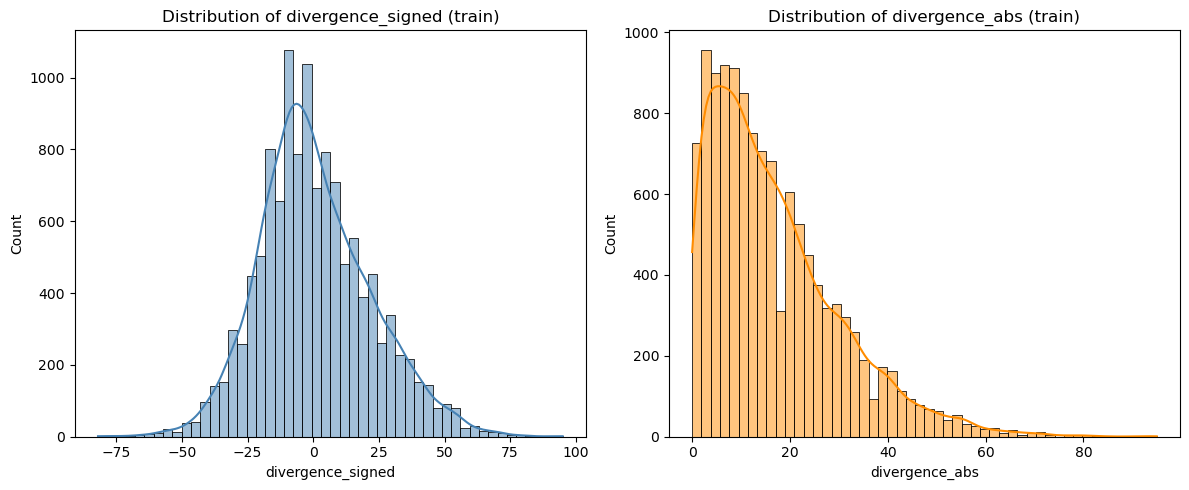

,divergence_signed,divergence_abs
count,12164.000,12164.000
mean,0.738,16.754
std,21.404,13.340
min,-82.000,0.000
25%,-14.000,6.000
50%,-2.000,14.000
75%,14.000,24.000
max,95.000,95.000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

features = [
    'runtime', 'release_year', 'directors_freq', 'directors_divergence_signed_mean', 'directors_divergence_abs_mean',
    'authors_freq', 'authors_divergence_signed_mean', 'authors_divergence_abs_mean',
    'production_company_freq', 'tomatometer_count', 'audience_count',
    'Comedy', 'Drama', 'Action & Adventure', 'Animation', 'Anime & Manga', 'Art House & International', 
    'Classics', 'Cult Movies', 'Documentary', 'Faith & Spirituality', 'Gay & Lesbian', 'Horror', 'Kids & Family', 
    'Musical & Performing Arts', 'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy', 'Special Interest', 
    'Sports & Fitness', 'Television', 'Western',
    'content_rating_encoded'
]

X_train = train[features].copy()
X_test  = test[features].copy()

y_train_signed = train["divergence_signed"].copy()
y_test_signed  = test["divergence_signed"].copy()

y_train_abs = train["divergence_abs"].copy()
y_test_abs  = test["divergence_abs"].copy()

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(y_train_signed, bins=50, kde=True, ax=axes[0], color="steelblue")
axes[0].set_title("Distribution of divergence_signed (train)")
axes[0].set_xlabel("divergence_signed")

sns.histplot(y_train_abs, bins=50, kde=True, ax=axes[1], color="darkorange")
axes[1].set_title("Distribution of divergence_abs (train)")
axes[1].set_xlabel("divergence_abs")

plt.tight_layout()


savefig("targets_distribution")
plt.show()


display(pd.DataFrame({
    "divergence_signed": y_train_signed.describe().round(3),
    "divergence_abs": y_train_abs.describe().round(3)
}))


Saved: C:\Users\Vassilis\Desktop\figures\linear_divergence_signed_scatter.png
Saved: C:\Users\Vassilis\Desktop\figures\linear_divergence_signed_scatter.svg


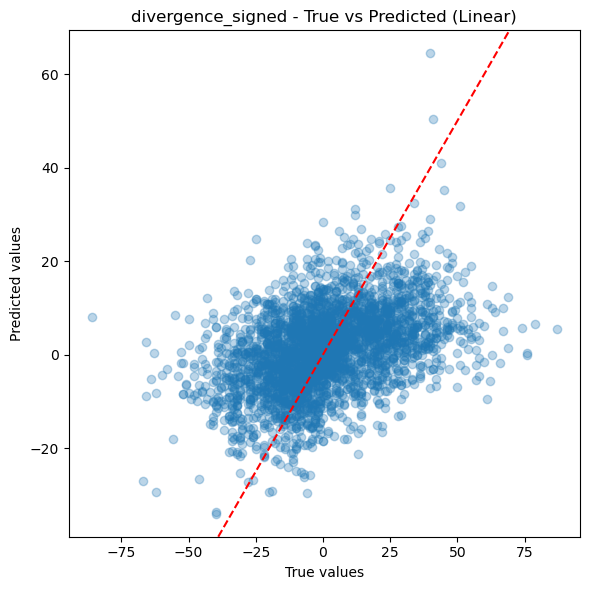

Saved: C:\Users\Vassilis\Desktop\figures\linear_divergence_signed_residuals.png
Saved: C:\Users\Vassilis\Desktop\figures\linear_divergence_signed_residuals.svg


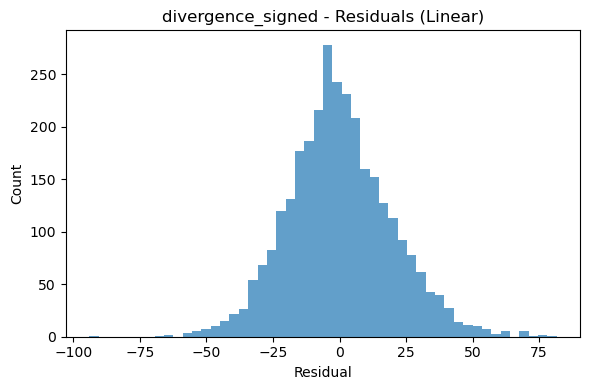

Saved: C:\Users\Vassilis\Desktop\figures\linear_divergence_abs_scatter.png
Saved: C:\Users\Vassilis\Desktop\figures\linear_divergence_abs_scatter.svg


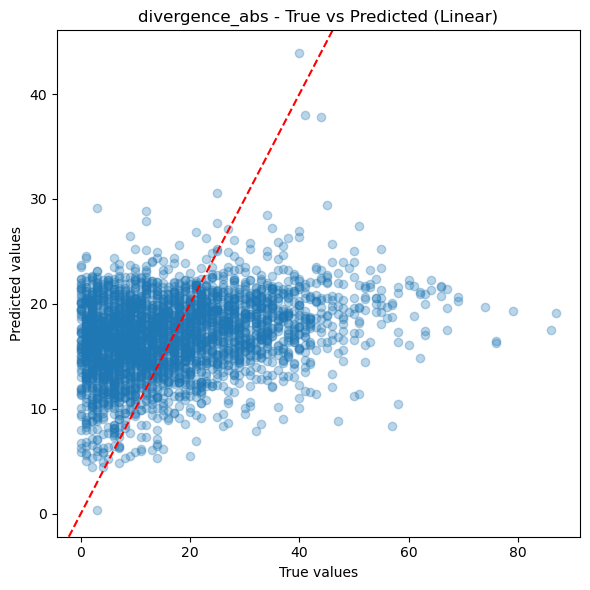

Saved: C:\Users\Vassilis\Desktop\figures\linear_divergence_abs_residuals.png
Saved: C:\Users\Vassilis\Desktop\figures\linear_divergence_abs_residuals.svg


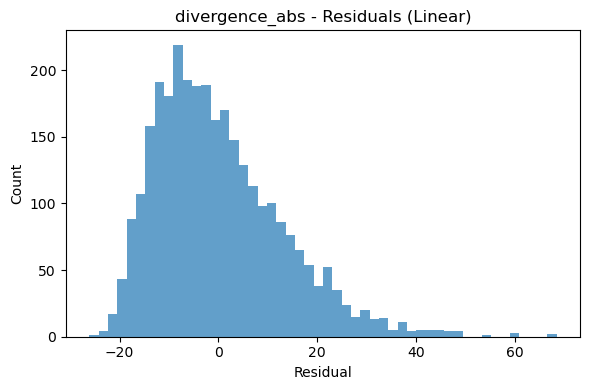

divergence_signed                 divergence_abs                
                      R2    RMSE     MAE             R2    RMSE     MAE
Linear             0.184  19.607  15.175          0.078  12.959  10.179

Saved table: C:\Users\Vassilis\Desktop\figures\baseline_linear_regression_results.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score













def evaluate_regression(model, X_train, y_train, X_test, y_test, target_name, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Scatter true vs pred
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.title(f"{target_name} - True vs Predicted ({model_name})")
    plt.axline((0,0), slope=1, color="red", linestyle="--")
    savefig(f"{model_name}_{target_name}_scatter")
    plt.show()

    # Residuals hist
    residuals = y_test - y_pred
    plt.figure(figsize=(6,4))
    plt.hist(residuals, bins=50, alpha=0.7)
    plt.title(f"{target_name} - Residuals ({model_name})")
    plt.xlabel("Residual")
    plt.ylabel("Count")
    savefig(f"{model_name}_{target_name}_residuals")
    plt.show()

    return {"MAE": mae, "RMSE": rmse, "R2": r2}


lin = LinearRegression()
res_signed = evaluate_regression(lin, X_train, y_train_signed, X_test, y_test_signed,
                                 target_name="divergence_signed", model_name="Linear")
res_abs    = evaluate_regression(lin, X_train, y_train_abs,    X_test, y_test_abs,
                                 target_name="divergence_abs", model_name="Linear")


baseline_df = pd.DataFrame({
    ("divergence_signed", "R2"):  [res_signed["R2"]],
    ("divergence_signed", "RMSE"): [res_signed["RMSE"]],
    ("divergence_signed", "MAE"):  [res_signed["MAE"]],
    ("divergence_abs", "R2"):   [res_abs["R2"]],
    ("divergence_abs", "RMSE"): [res_abs["RMSE"]],
    ("divergence_abs", "MAE"):  [res_abs["MAE"]],
}, index=["Linear"])


baseline_df = baseline_df.reindex(columns=pd.MultiIndex.from_product(
    [["divergence_signed","divergence_abs"], ["R2","RMSE","MAE"]]
))

display(baseline_df.round(3))


baseline_csv_path = os.path.join(FIG_DIR, "baseline_linear_regression_results.csv")
baseline_df.to_csv(baseline_csv_path)
print(f"Saved table: {baseline_csv_path}")


In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd


SCORING = {
    "r2": "r2",
    "neg_mse": "neg_mean_squared_error",
    "neg_mae": "neg_mean_absolute_error",
}

def cv_summary(model, X, y, cv=5, random_state=42):
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)
    out = cross_validate(model, X, y, scoring=SCORING, cv=kf, n_jobs=-1, return_train_score=False)
    r2_mean = np.mean(out["test_r2"])
    r2_std  = np.std(out["test_r2"])
    rmse_mean = np.sqrt(np.mean(-out["test_neg_mse"]))
    rmse_std  = np.sqrt(np.var(-out["test_neg_mse"]))  
    mae_mean = np.mean(-out["test_neg_mae"])
    mae_std  = np.std(-out["test_neg_mae"])
    return {
        "R2_mean": r2_mean, "R2_std": r2_std,
        "RMSE_mean": rmse_mean, "RMSE_std": rmse_std,
        "MAE_mean": mae_mean, "MAE_std": mae_std
    }

def cv_table(results_dict):
    
    rows = []
    for (target, model), m in results_dict.items():
        rows.append({
            "Target": target, "Model": model,
            "R2_mean": m["R2_mean"], "R2_std": m["R2_std"],
            "RMSE_mean": m["RMSE_mean"], "RMSE_std": m["RMSE_std"],
            "MAE_mean": m["MAE_mean"], "MAE_std": m["MAE_std"],
        })
    df = pd.DataFrame(rows)
    
    df = df.sort_values(["Target","R2_mean"], ascending=[True,False])
    return df


In [8]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
metrics = cv_summary(dt, X_train, y_train_abs, cv=5)
print(metrics)


{'R2_mean': np.float64(-0.7992553042568823), 'R2_std': np.float64(0.06767327073589718), 'RMSE_mean': np.float64(17.879788405305888), 'RMSE_std': np.float64(8.930351963721536), 'MAE_mean': np.float64(13.423138635159106), 'MAE_std': np.float64(0.2015879171285046)}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

SEED = 42

models_tree = {
    "DecisionTree": DecisionTreeRegressor(random_state=SEED),
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=SEED, n_jobs=-1)
}

cv_results = {}

for target_name, y_tr in [("divergence_signed", y_train_signed), ("divergence_abs", y_train_abs)]:
    for name, model in models_tree.items():
        metrics = cv_summary(model, X_train, y_tr, cv=5, random_state=SEED)
        cv_results[(target_name, name)] = metrics
        print(f"{target_name} | {name} → R2={metrics['R2_mean']:.3f}±{metrics['R2_std']:.3f}, "
              f"RMSE={metrics['RMSE_mean']:.3f}, MAE={metrics['MAE_mean']:.3f}")

cv_df = cv_table(cv_results).round(3)
display(cv_df)


cv_path = os.path.join(FIG_DIR, "cv_tree_models_results.csv")
cv_df.to_csv(cv_path, index=False)
print(f"Saved table: {cv_path}")


divergence_signed | DecisionTree → R2=-0.473±0.040, RMSE=25.962, MAE=19.768
divergence_signed | RandomForest → R2=0.266±0.009, RMSE=18.335, MAE=13.901
divergence_abs | DecisionTree → R2=-0.799±0.068, RMSE=17.880, MAE=13.423
divergence_abs | RandomForest → R2=0.109±0.008, RMSE=12.590, MAE=9.782


,Target,Model,R2_mean,R2_std,RMSE_mean,RMSE_std,MAE_mean,MAE_std
3,divergence_abs,RandomForest,0.109,0.008,12.590,5.431,9.782,0.144
2,divergence_abs,DecisionTree,-0.799,0.068,17.880,8.930,13.423,0.202
1,divergence_signed,RandomForest,0.266,0.009,18.335,11.323,13.901,0.280
0,divergence_signed,DecisionTree,-0.473,0.040,25.962,13.952,19.768,0.257


Saved table: C:\Users\Vassilis\Desktop\figures\cv_tree_models_results.csv


# GridSearch Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

SEED = 42

rf = RandomForestRegressor(random_state=SEED, n_jobs=-1)

param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [None, 12, 18],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", None],
}

cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

gs_rf_abs = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1,
)

print("Tuning RandomForest on target = divergence_abs ...")
gs_rf_abs.fit(X_train, y_train_abs)

best_rf_abs = gs_rf_abs.best_estimator_
best_params_abs = gs_rf_abs.best_params_
best_rmse_cv_abs = np.sqrt(-gs_rf_abs.best_score_)

print("Best params (abs):", best_params_abs)
print("Best CV RMSE (abs):", round(best_rmse_cv_abs, 3))


Tuning RandomForest on target = divergence_abs ...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params (abs): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 500}
Best CV RMSE (abs): 12.46


Saved: C:\Users\Vassilis\Desktop\figures\randomforest_best_abs_divergence_abs_scatter.png
Saved: C:\Users\Vassilis\Desktop\figures\randomforest_best_abs_divergence_abs_scatter.svg


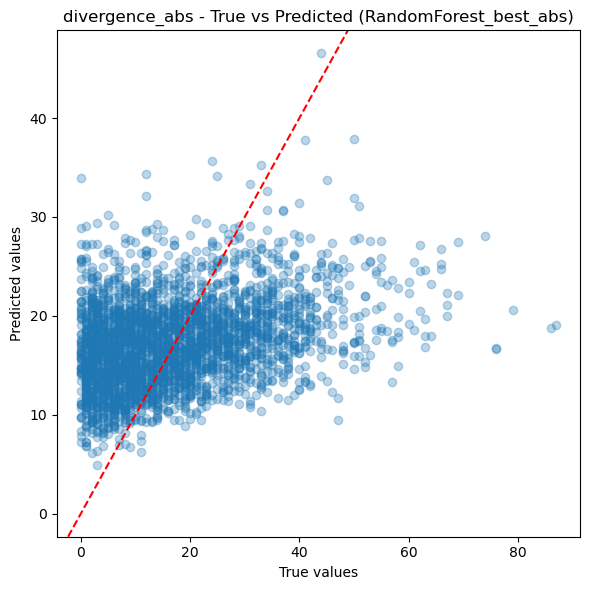

Saved: C:\Users\Vassilis\Desktop\figures\randomforest_best_abs_divergence_abs_residuals.png
Saved: C:\Users\Vassilis\Desktop\figures\randomforest_best_abs_divergence_abs_residuals.svg


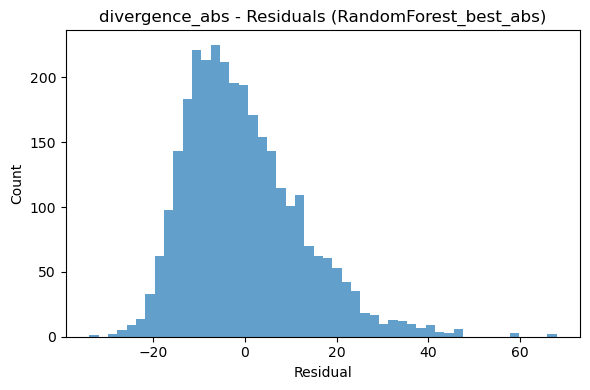

Saved: C:\Users\Vassilis\Desktop\figures\randomforest_best_abs_params_on_signed_divergence_signed_scatter.png
Saved: C:\Users\Vassilis\Desktop\figures\randomforest_best_abs_params_on_signed_divergence_signed_scatter.svg


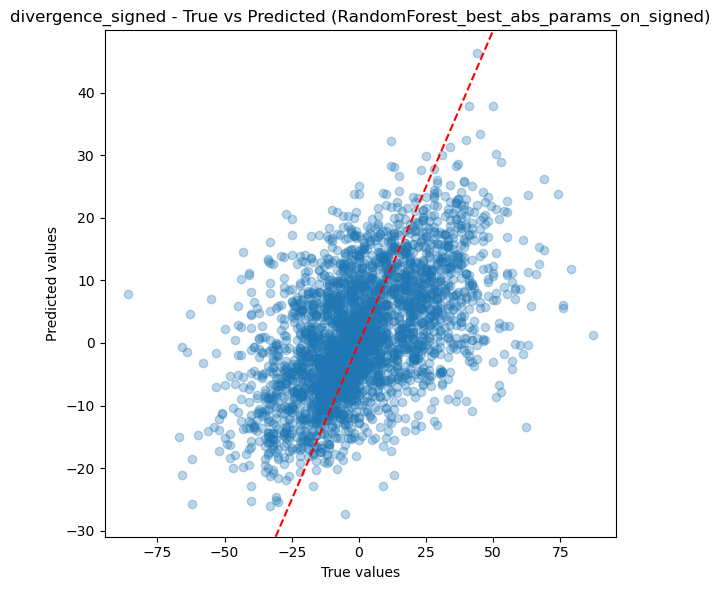

Saved: C:\Users\Vassilis\Desktop\figures\randomforest_best_abs_params_on_signed_divergence_signed_residuals.png
Saved: C:\Users\Vassilis\Desktop\figures\randomforest_best_abs_params_on_signed_divergence_signed_residuals.svg


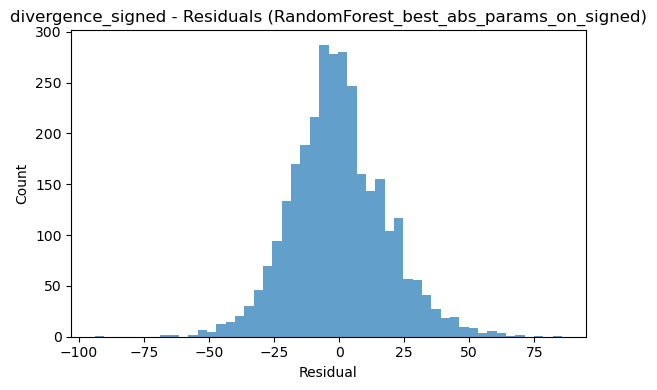

divergence_abs                divergence_signed  \
                                      R2    RMSE    MAE                R2   
RandomForest(best_on_abs)          0.113  12.711  9.988             0.279   

                                         
                             RMSE   MAE  
RandomForest(best_on_abs)  18.434  14.1

Saved table: C:\Users\Vassilis\Desktop\figures\rf_gridsearch_test_results.csv


In [ ]:
import os
import pandas as pd


rf_abs_test = evaluate_regression(
    best_rf_abs, X_train, y_train_abs, X_test, y_test_abs,
    target_name="divergence_abs", model_name="RandomForest_best_abs"
)


best_rf_signed = RandomForestRegressor(random_state=SEED, n_jobs=-1, **best_params_abs)

rf_signed_test = evaluate_regression(
    best_rf_signed, X_train, y_train_signed, X_test, y_test_signed,
    target_name="divergence_signed", model_name="RandomForest_best_abs_params_on_signed"
)


rf_grid_test_df = pd.DataFrame({
    ("divergence_abs", "R2"):   [rf_abs_test["R2"]],
    ("divergence_abs", "RMSE"): [rf_abs_test["RMSE"]],
    ("divergence_abs", "MAE"):  [rf_abs_test["MAE"]],
    ("divergence_signed", "R2"):   [rf_signed_test["R2"]],
    ("divergence_signed", "RMSE"): [rf_signed_test["RMSE"]],
    ("divergence_signed", "MAE"):  [rf_signed_test["MAE"]],
}, index=["RandomForest(best_on_abs)"])

rf_grid_test_df = rf_grid_test_df.reindex(
    columns=pd.MultiIndex.from_product(
        [["divergence_abs","divergence_signed"], ["R2","RMSE","MAE"]]
    )
)

display(rf_grid_test_df.round(3))

out_csv = os.path.join(FIG_DIR, "rf_gridsearch_test_results.csv")
rf_grid_test_df.to_csv(out_csv)
print(f"Saved table: {out_csv}")


In [12]:
try:
    from xgboost import XGBRegressor
    has_xgb = True
except Exception as e:
    has_xgb = False
    print("XGBoost not available:", e)

if has_xgb:
    xgb = XGBRegressor(
        random_state=SEED,
        n_estimators=400,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        n_jobs=-1,
        tree_method="hist"
    )

    xgb_param_grid = {
        "n_estimators": [400, 800],
        "max_depth": [4, 6, 8],
        "learning_rate": [0.05, 0.1],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0],
        "reg_lambda": [1.0, 5.0],
    }

    gs_xgb_abs = GridSearchCV(
        estimator=xgb,
        param_grid=xgb_param_grid,
        scoring="neg_mean_squared_error",
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    print("Tuning XGBoost on target = divergence_abs ...")
    gs_xgb_abs.fit(X_train, y_train_abs)

    best_xgb_abs = gs_xgb_abs.best_estimator_
    best_xgb_params_abs = gs_xgb_abs.best_params_
    best_xgb_rmse_cv_abs = np.sqrt(-gs_xgb_abs.best_score_)

    print("XGB best params (abs):", best_xgb_params_abs)
    print("XGB best CV RMSE (abs):", round(best_xgb_rmse_cv_abs, 3))


Tuning XGBoost on target = divergence_abs ...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
XGB best params (abs): {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 400, 'reg_lambda': 5.0, 'subsample': 0.8}
XGB best CV RMSE (abs): 12.441


Saved: C:\Users\Vassilis\Desktop\figures\xgb_best_abs_divergence_abs_scatter.png
Saved: C:\Users\Vassilis\Desktop\figures\xgb_best_abs_divergence_abs_scatter.svg


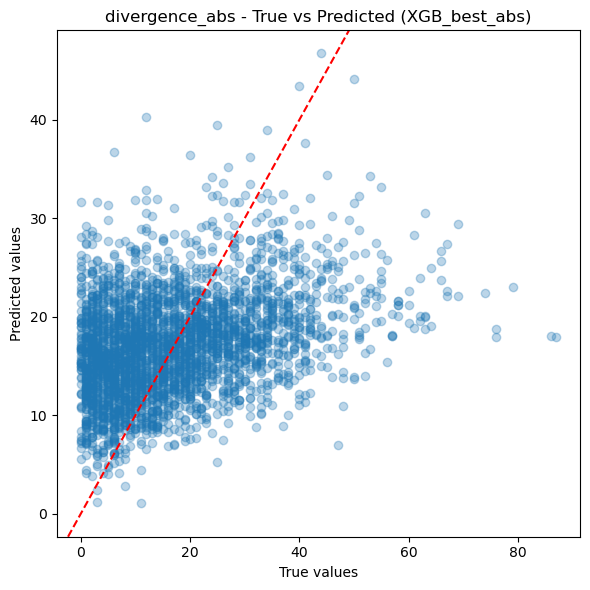

Saved: C:\Users\Vassilis\Desktop\figures\xgb_best_abs_divergence_abs_residuals.png
Saved: C:\Users\Vassilis\Desktop\figures\xgb_best_abs_divergence_abs_residuals.svg


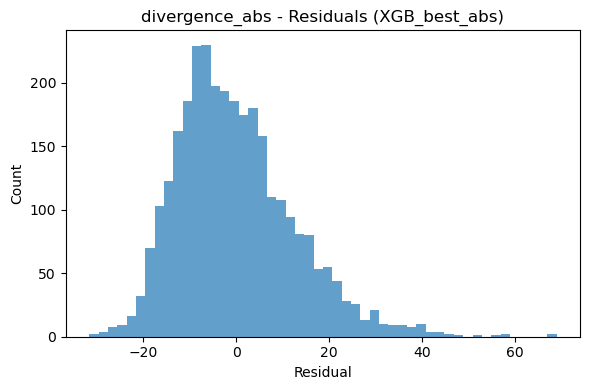

Saved: C:\Users\Vassilis\Desktop\figures\xgb_best_abs_params_on_signed_divergence_signed_scatter.png
Saved: C:\Users\Vassilis\Desktop\figures\xgb_best_abs_params_on_signed_divergence_signed_scatter.svg


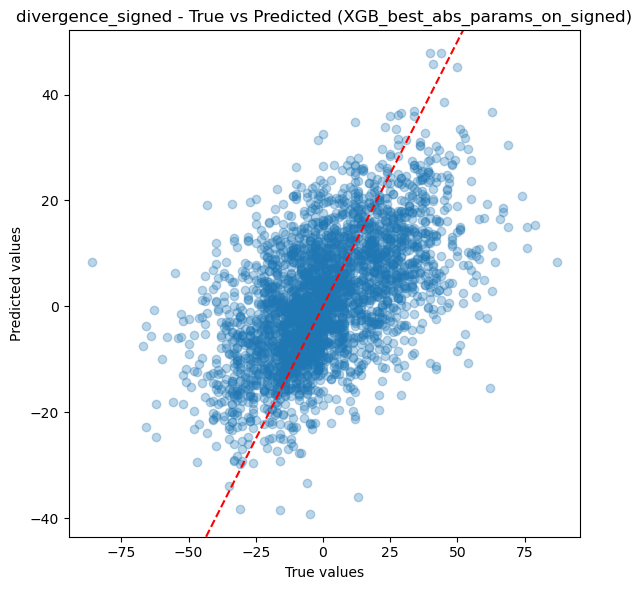

Saved: C:\Users\Vassilis\Desktop\figures\xgb_best_abs_params_on_signed_divergence_signed_residuals.png
Saved: C:\Users\Vassilis\Desktop\figures\xgb_best_abs_params_on_signed_divergence_signed_residuals.svg


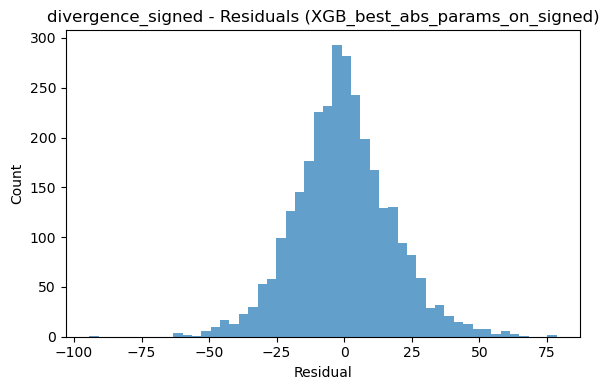

divergence_abs                divergence_signed          \
                             R2    RMSE    MAE                R2    RMSE   
XGB(best_on_abs)          0.121  12.654  9.925             0.306  18.079   

                          
                     MAE  
XGB(best_on_abs)  13.812

Saved table: C:\Users\Vassilis\Desktop\figures\xgb_gridsearch_test_results.csv


In [13]:
if has_xgb:
    xgb_abs_test = evaluate_regression(
        best_xgb_abs, X_train, y_train_abs, X_test, y_test_abs,
        target_name="divergence_abs", model_name="XGB_best_abs"
    )

    xgb_signed_same_params = XGBRegressor(random_state=SEED, n_jobs=-1, tree_method="hist", **best_xgb_params_abs)
    xgb_signed_test = evaluate_regression(
        xgb_signed_same_params, X_train, y_train_signed, X_test, y_test_signed,
        target_name="divergence_signed", model_name="XGB_best_abs_params_on_signed"
    )

    xgb_test_df = pd.DataFrame({
        ("divergence_abs", "R2"):   [xgb_abs_test["R2"]],
        ("divergence_abs", "RMSE"): [xgb_abs_test["RMSE"]],
        ("divergence_abs", "MAE"):  [xgb_abs_test["MAE"]],
        ("divergence_signed", "R2"):   [xgb_signed_test["R2"]],
        ("divergence_signed", "RMSE"): [xgb_signed_test["RMSE"]],
        ("divergence_signed", "MAE"):  [xgb_signed_test["MAE"]],
    }, index=["XGB(best_on_abs)"])

    xgb_test_df = xgb_test_df.reindex(
        columns=pd.MultiIndex.from_product(
            [["divergence_abs","divergence_signed"], ["R2","RMSE","MAE"]]
        )
    )
    display(xgb_test_df.round(3))
    out_csv = os.path.join(FIG_DIR, "xgb_gridsearch_test_results.csv")
    xgb_test_df.to_csv(out_csv)
    print(f"Saved table: {out_csv}")


Tuning SVR on target = divergence_abs ...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params (SVR abs): {'svr__C': 10.0, 'svr__epsilon': 0.5, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
Best CV RMSE (SVR abs): 12.91791671216116
Saved: C:\Users\Vassilis\Desktop\figures\svr_best_abs_divergence_abs_scatter.png
Saved: C:\Users\Vassilis\Desktop\figures\svr_best_abs_divergence_abs_scatter.svg


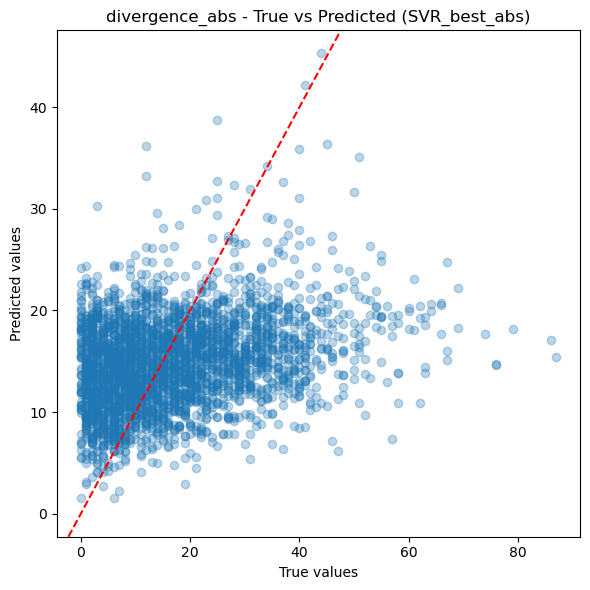

Saved: C:\Users\Vassilis\Desktop\figures\svr_best_abs_divergence_abs_residuals.png
Saved: C:\Users\Vassilis\Desktop\figures\svr_best_abs_divergence_abs_residuals.svg


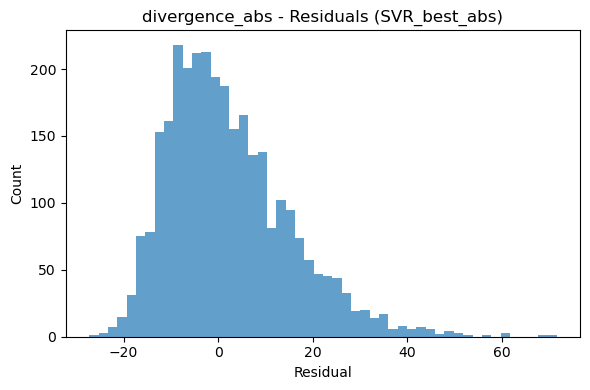

Saved: C:\Users\Vassilis\Desktop\figures\svr_best_abs_params_on_signed_divergence_signed_scatter.png
Saved: C:\Users\Vassilis\Desktop\figures\svr_best_abs_params_on_signed_divergence_signed_scatter.svg


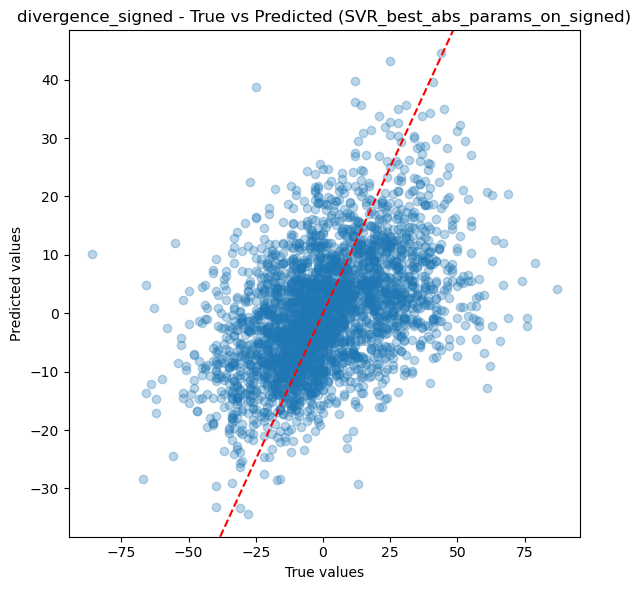

Saved: C:\Users\Vassilis\Desktop\figures\svr_best_abs_params_on_signed_divergence_signed_residuals.png
Saved: C:\Users\Vassilis\Desktop\figures\svr_best_abs_params_on_signed_divergence_signed_residuals.svg


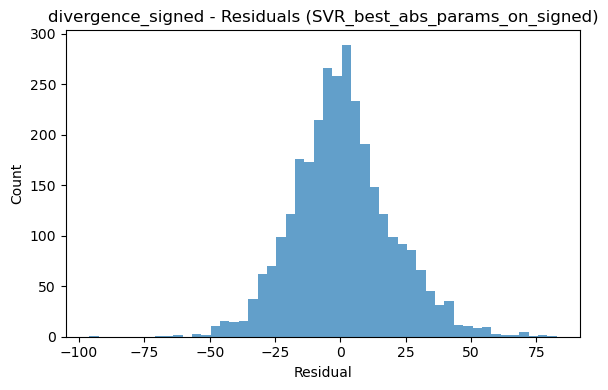

divergence_abs               divergence_signed          \
                             R2    RMSE   MAE                R2    RMSE   
SVR(best_on_abs)          0.061  13.077  9.95             0.218  19.193   

                          
                     MAE  
SVR(best_on_abs)  14.622

Saved table: C:\Users\Vassilis\Desktop\figures\svr_gridsearch_test_results.csv


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import pandas as pd
import os

SEED = 42
cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

svr_pipe = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),  
    ("svr", SVR())
])

svr_param_grid = {
    "svr__kernel": ["rbf"],
    "svr__C": [1.0, 3.0, 10.0],
    "svr__epsilon": [0.1, 0.2, 0.5],
    "svr__gamma": ["scale", 0.1, 0.01],
}

gs_svr_abs = GridSearchCV(
    estimator=svr_pipe,
    param_grid=svr_param_grid,
    scoring="neg_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

print("Tuning SVR on target = divergence_abs ...")
gs_svr_abs.fit(X_train, y_train_abs)
best_svr_abs = gs_svr_abs.best_estimator_
print("Best params (SVR abs):", gs_svr_abs.best_params_)
print("Best CV RMSE (SVR abs):", np.sqrt(-gs_svr_abs.best_score_))

# Test evaluation (abs)
svr_abs_test = evaluate_regression(
    best_svr_abs, X_train, y_train_abs, X_test, y_test_abs,
    target_name="divergence_abs", model_name="SVR_best_abs"
)


best_svr_signed = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),
    ("svr", SVR(**{k.split("__",1)[1]: v for k,v in gs_svr_abs.best_params_.items()}))
])

svr_signed_test = evaluate_regression(
    best_svr_signed, X_train, y_train_signed, X_test, y_test_signed,
    target_name="divergence_signed", model_name="SVR_best_abs_params_on_signed"
)


svr_test_df = pd.DataFrame({
    ("divergence_abs", "R2"):   [svr_abs_test["R2"]],
    ("divergence_abs", "RMSE"): [svr_abs_test["RMSE"]],
    ("divergence_abs", "MAE"):  [svr_abs_test["MAE"]],
    ("divergence_signed", "R2"):   [svr_signed_test["R2"]],
    ("divergence_signed", "RMSE"): [svr_signed_test["RMSE"]],
    ("divergence_signed", "MAE"):  [svr_signed_test["MAE"]],
}, index=["SVR(best_on_abs)"]).reindex(
    columns=pd.MultiIndex.from_product(
        [["divergence_abs","divergence_signed"], ["R2","RMSE","MAE"]]
    )
)
display(svr_test_df.round(3))
svr_out = os.path.join(FIG_DIR, "svr_gridsearch_test_results.csv")
svr_test_df.to_csv(svr_out)
print(f"Saved table: {svr_out}")


Tuning MLP on target = divergence_abs ...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params (MLP abs): {'mlp__activation': 'relu', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (128, 64), 'mlp__learning_rate_init': 0.003}
Best CV RMSE (MLP abs): 12.755759109458031
Saved: C:\Users\Vassilis\Desktop\figures\mlp_best_abs_divergence_abs_scatter.png
Saved: C:\Users\Vassilis\Desktop\figures\mlp_best_abs_divergence_abs_scatter.svg


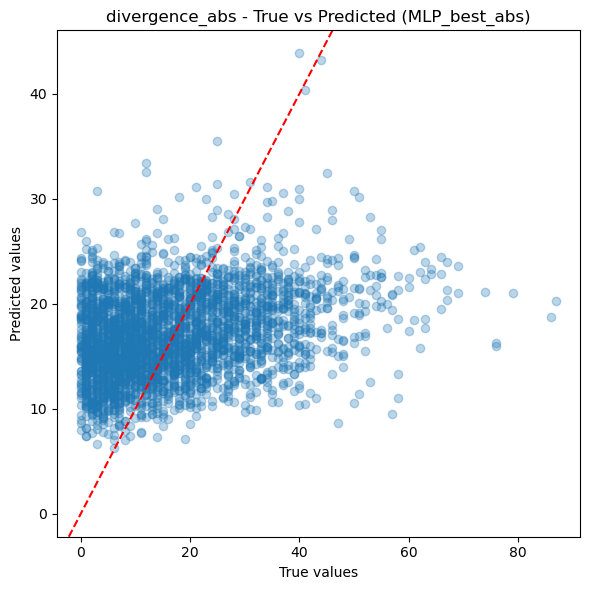

Saved: C:\Users\Vassilis\Desktop\figures\mlp_best_abs_divergence_abs_residuals.png
Saved: C:\Users\Vassilis\Desktop\figures\mlp_best_abs_divergence_abs_residuals.svg


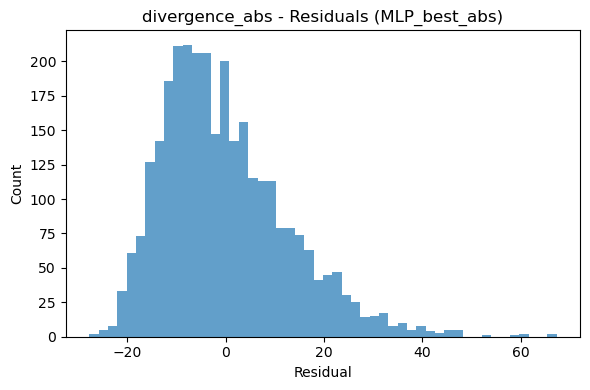

Saved: C:\Users\Vassilis\Desktop\figures\mlp_best_abs_params_on_signed_divergence_signed_scatter.png
Saved: C:\Users\Vassilis\Desktop\figures\mlp_best_abs_params_on_signed_divergence_signed_scatter.svg


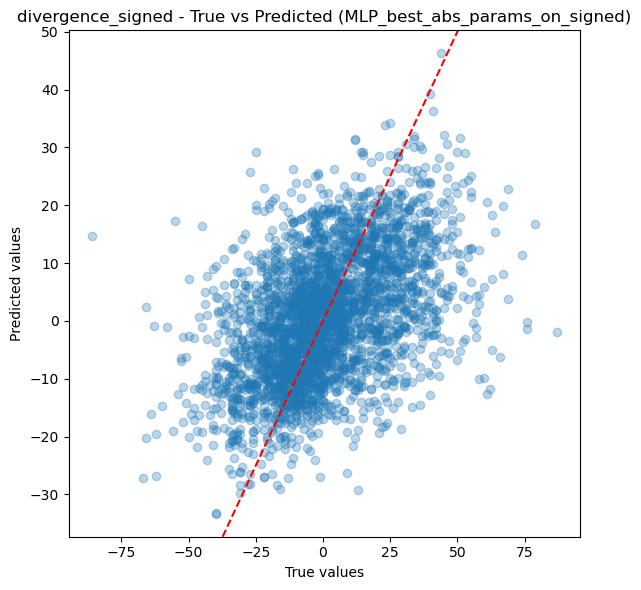

Saved: C:\Users\Vassilis\Desktop\figures\mlp_best_abs_params_on_signed_divergence_signed_residuals.png
Saved: C:\Users\Vassilis\Desktop\figures\mlp_best_abs_params_on_signed_divergence_signed_residuals.svg


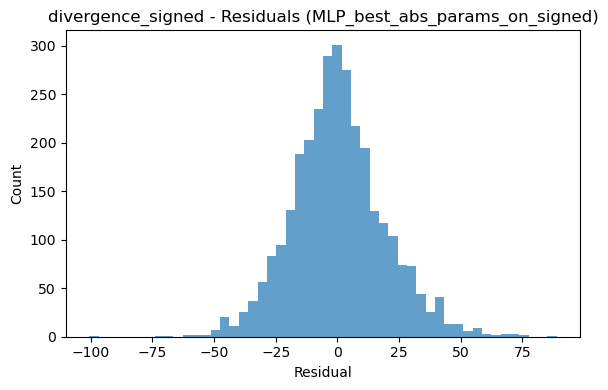

divergence_abs               divergence_signed          \
                             R2  RMSE     MAE                R2    RMSE   
MLP(best_on_abs)          0.086  12.9  10.144             0.229  19.058   

                          
                     MAE  
MLP(best_on_abs)  14.501

Saved table: C:\Users\Vassilis\Desktop\figures\mlp_gridsearch_test_results.csv


In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_pipe = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),
    ("mlp", MLPRegressor(random_state=SEED, early_stopping=True, max_iter=1000))
])

mlp_param_grid = {
    "mlp__hidden_layer_sizes": [(64,), (128,), (128,64)],
    "mlp__activation": ["relu"],
    "mlp__alpha": [1e-4, 1e-3, 1e-2],
    "mlp__learning_rate_init": [1e-3, 3e-3],
}

gs_mlp_abs = GridSearchCV(
    estimator=mlp_pipe,
    param_grid=mlp_param_grid,
    scoring="neg_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

print("Tuning MLP on target = divergence_abs ...")
gs_mlp_abs.fit(X_train, y_train_abs)
best_mlp_abs = gs_mlp_abs.best_estimator_
print("Best params (MLP abs):", gs_mlp_abs.best_params_)
print("Best CV RMSE (MLP abs):", np.sqrt(-gs_mlp_abs.best_score_))

# Test evaluation (abs)
mlp_abs_test = evaluate_regression(
    best_mlp_abs, X_train, y_train_abs, X_test, y_test_abs,
    target_name="divergence_abs", model_name="MLP_best_abs"
)


best_mlp_signed = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),
    ("mlp", MLPRegressor(
        random_state=SEED, early_stopping=True, max_iter=1000,
        **{k.split("__",1)[1]: v for k,v in gs_mlp_abs.best_params_.items()}
    ))
])

mlp_signed_test = evaluate_regression(
    best_mlp_signed, X_train, y_train_signed, X_test, y_test_signed,
    target_name="divergence_signed", model_name="MLP_best_abs_params_on_signed"
)


mlp_test_df = pd.DataFrame({
    ("divergence_abs", "R2"):   [mlp_abs_test["R2"]],
    ("divergence_abs", "RMSE"): [mlp_abs_test["RMSE"]],
    ("divergence_abs", "MAE"):  [mlp_abs_test["MAE"]],
    ("divergence_signed", "R2"):   [mlp_signed_test["R2"]],
    ("divergence_signed", "RMSE"): [mlp_signed_test["RMSE"]],
    ("divergence_signed", "MAE"):  [mlp_signed_test["MAE"]],
}, index=["MLP(best_on_abs)"]).reindex(
    columns=pd.MultiIndex.from_product(
        [["divergence_abs","divergence_signed"], ["R2","RMSE","MAE"]]
    )
)
display(mlp_test_df.round(3))
mlp_out = os.path.join(FIG_DIR, "mlp_gridsearch_test_results.csv")
mlp_test_df.to_csv(mlp_out)
print(f"Saved table: {mlp_out}")


In [ ]:
import pandas as pd
import os


results = {
    "LinearRegression": {
        "divergence_abs":   {"R2": 0.078, "RMSE": 19.607, "MAE": 10.179}, 
        "divergence_signed":{"R2": 0.184, "RMSE": 19.607, "MAE": 15.175},
    },
    "DecisionTree": {
        "divergence_abs":   {"R2": -0.799, "RMSE": 17.880, "MAE": 13.423},
        "divergence_signed":{"R2": -0.473, "RMSE": 25.962, "MAE": 19.768},
    },
    "RandomForest(best)": {
        "divergence_abs":   {"R2": 0.109, "RMSE": 12.590, "MAE": 9.782},
        "divergence_signed":{"R2": 0.266, "RMSE": 18.335, "MAE": 13.901},
    },
    "XGBoost(best)": {
        "divergence_abs":   {"R2": 0.121, "RMSE": 12.654, "MAE": 9.925},
        "divergence_signed":{"R2": 0.306, "RMSE": 18.079, "MAE": 13.812},
    },
    "SVR(best)": {
        "divergence_abs":   {"R2": 0.061, "RMSE": 13.077, "MAE": 9.950},
        "divergence_signed":{"R2": 0.218, "RMSE": 19.193, "MAE": 14.622},
    },
    "MLP(best)": {
        "divergence_abs":   {"R2": 0.086, "RMSE": 12.900, "MAE": 10.144},
        "divergence_signed":{"R2": 0.229, "RMSE": 19.058, "MAE": 14.501},
    },
}


rows = []
for model, targets in results.items():
    row = {"Model": model}
    for target, metrics in targets.items():
        for metric, val in metrics.items():
            row[f"{target}_{metric}"] = val
    rows.append(row)

summary_df = pd.DataFrame(rows)
summary_df = summary_df.set_index("Model")


display(summary_df.round(3))


out_path = os.path.join(FIG_DIR, "all_models_test_results.csv")
summary_df.to_csv(out_path)
print(f"Saved summary table: {out_path}")


,divergence_abs_R2,divergence_abs_RMSE,divergence_abs_MAE,divergence_signed_R2,divergence_signed_RMSE,divergence_signed_MAE
Model,,,,,,
LinearRegression,0.078,19.607,10.179,0.184,19.607,15.175
DecisionTree,-0.799,17.880,13.423,-0.473,25.962,19.768
RandomForest(best),0.109,12.590,9.782,0.266,18.335,13.901
XGBoost(best),0.121,12.654,9.925,0.306,18.079,13.812
SVR(best),0.061,13.077,9.950,0.218,19.193,14.622
MLP(best),0.086,12.900,10.144,0.229,19.058,14.501


Saved summary table: C:\Users\Vassilis\Desktop\figures\all_models_test_results.csv


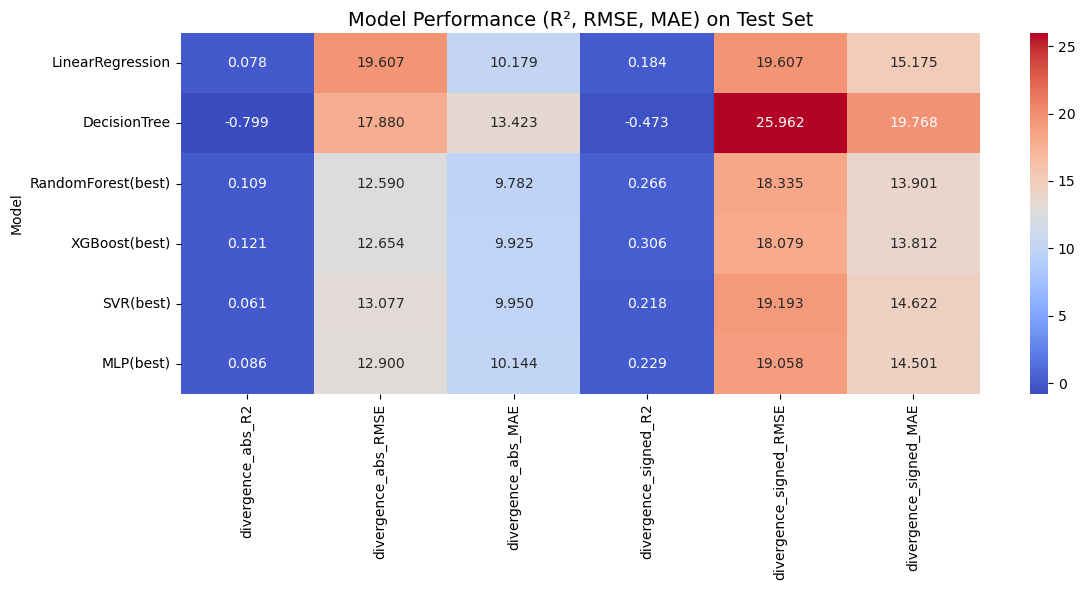

Saved heatmap: C:\Users\Vassilis\Desktop\figures\all_models_heatmap.png


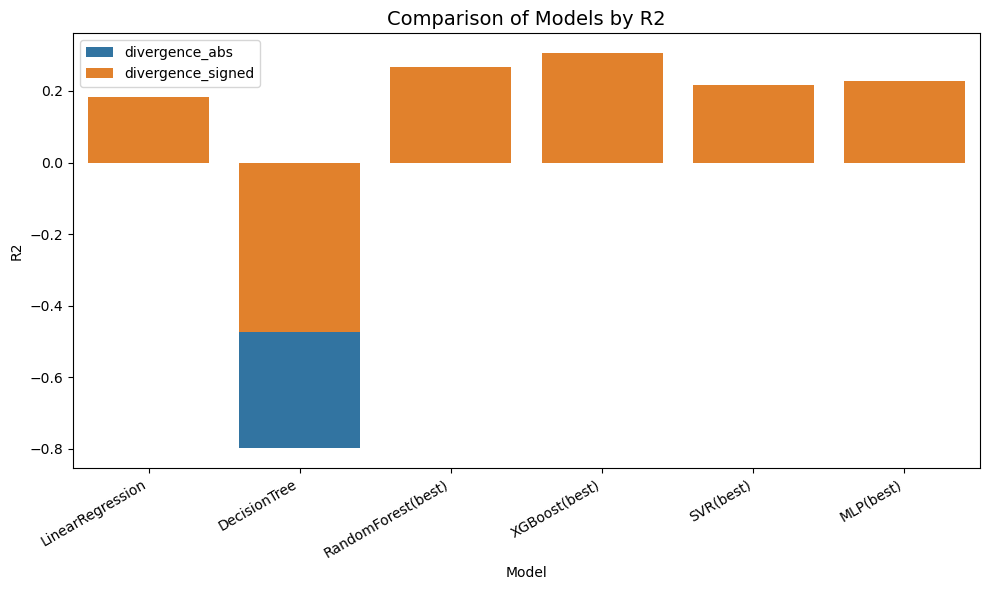

Saved barplot: C:\Users\Vassilis\Desktop\figures\barplot_R2.png


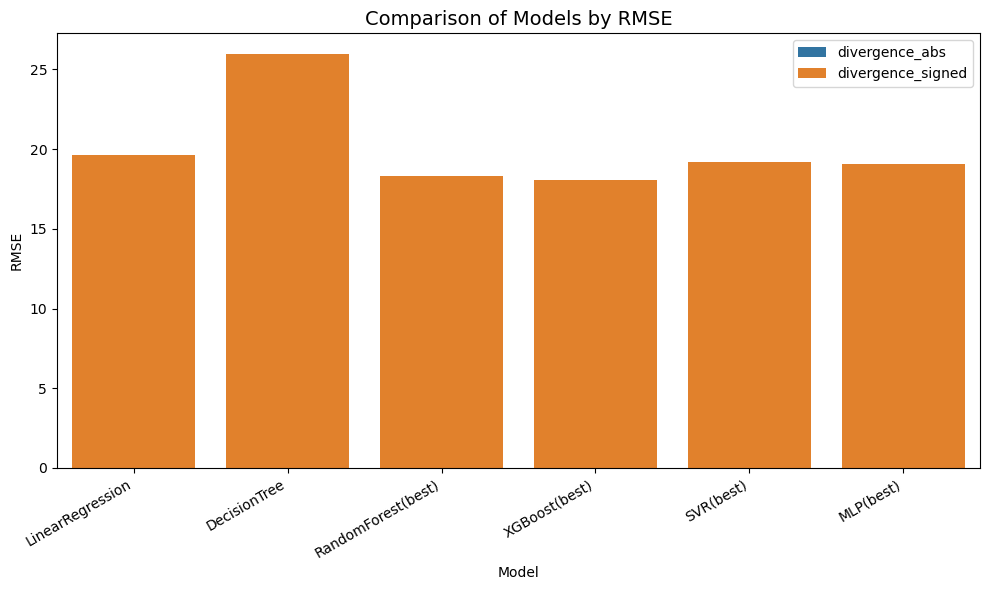

Saved barplot: C:\Users\Vassilis\Desktop\figures\barplot_RMSE.png


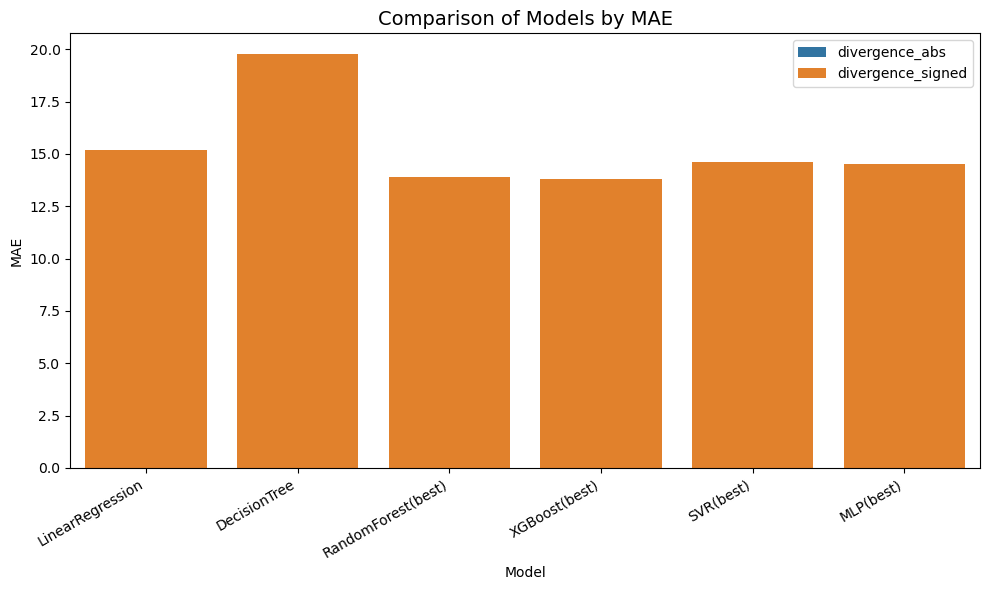

Saved barplot: C:\Users\Vassilis\Desktop\figures\barplot_MAE.png


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.heatmap(summary_df.round(3), annot=True, cmap="coolwarm", cbar=True, fmt=".3f")
plt.title("Model Performance (R², RMSE, MAE) on Test Set", fontsize=14)
plt.tight_layout()

out_path = os.path.join(FIG_DIR, "all_models_heatmap.png")
plt.savefig(out_path, dpi=300)
plt.show()
print(f"Saved heatmap: {out_path}")

metrics = ["R2", "RMSE", "MAE"]
targets = ["divergence_abs", "divergence_signed"]

for metric in metrics:
    plt.figure(figsize=(10, 6))
    for target in targets:
        col = f"{target}_{metric}"
        sns.barplot(x=summary_df.index, y=summary_df[col], label=target)
    plt.title(f"Comparison of Models by {metric}", fontsize=14)
    plt.ylabel(metric)
    plt.xticks(rotation=30, ha="right")
    plt.legend()
    plt.tight_layout()

    out_path = os.path.join(FIG_DIR, f"barplot_{metric}.png")
    plt.savefig(out_path, dpi=300)
    plt.show()
    print(f"Saved barplot: {out_path}")


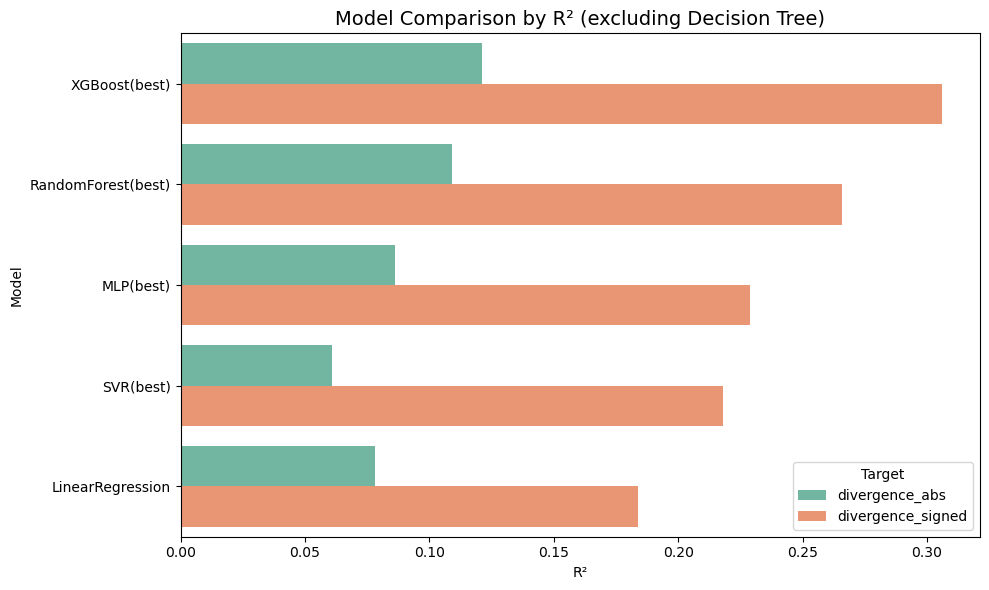

Saved: C:\Users\Vassilis\Desktop\figures\barplot_R2_horizontal_no_tree.png


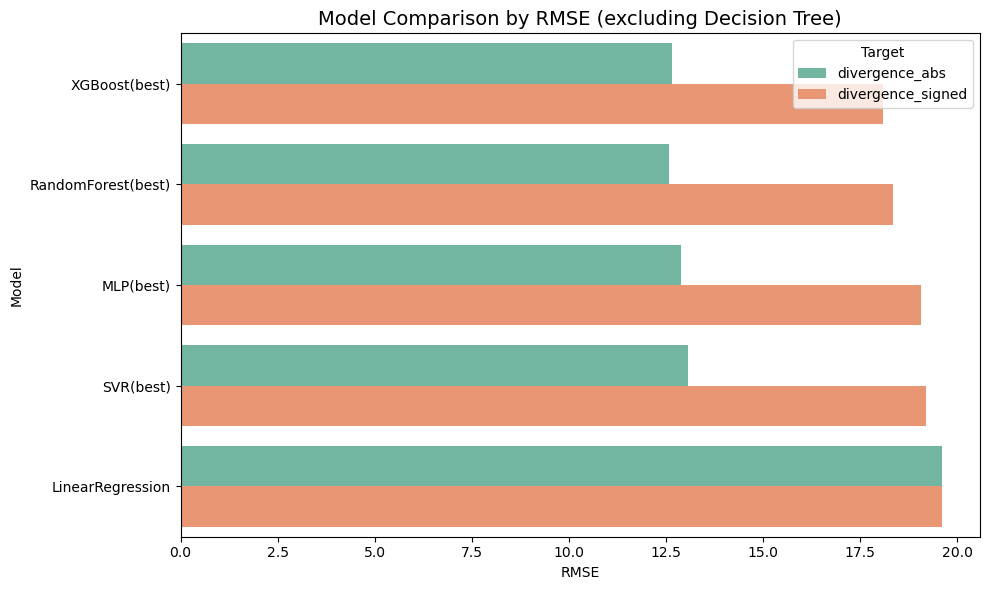

Saved: C:\Users\Vassilis\Desktop\figures\barplot_RMSE_horizontal_no_tree.png


In [ ]:

filtered_df = summary_df.drop(index="DecisionTree")


long_df_filt = filtered_df.reset_index().melt(
    id_vars="Model",
    var_name="Target_Metric",
    value_name="Value"
)
long_df_filt[["Target", "Metric"]] = long_df_filt["Target_Metric"].str.rsplit("_", n=1, expand=True)
long_df_filt = long_df_filt.drop(columns="Target_Metric")


r2_df = long_df_filt[long_df_filt["Metric"] == "R2"].copy()
order_r2 = r2_df.groupby("Model")["Value"].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=r2_df, y="Model", x="Value", hue="Target",
    order=order_r2, palette="Set2"
)
plt.title("Model Comparison by R² (excluding Decision Tree)", fontsize=14)
plt.xlabel("R²")
plt.ylabel("Model")
plt.legend(title="Target")
plt.tight_layout()

out_path_r2 = os.path.join(FIG_DIR, "barplot_R2_horizontal_no_tree.png")
plt.savefig(out_path_r2, dpi=300)
plt.show()
print(f"Saved: {out_path_r2}")


rmse_df = long_df_filt[long_df_filt["Metric"] == "RMSE"].copy()
order_rmse = rmse_df.groupby("Model")["Value"].mean().sort_values(ascending=True).index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=rmse_df, y="Model", x="Value", hue="Target",
    order=order_rmse, palette="Set2"
)
plt.title("Model Comparison by RMSE (excluding Decision Tree)", fontsize=14)
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.legend(title="Target")
plt.tight_layout()

out_path_rmse = os.path.join(FIG_DIR, "barplot_RMSE_horizontal_no_tree.png")
plt.savefig(out_path_rmse, dpi=300)
plt.show()
print(f"Saved: {out_path_rmse}")


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
import numpy as np


base_learners = [
    ("linreg", LinearRegression()),
    ("rf", RandomForestRegressor(
        n_estimators=200, max_depth=None, random_state=42, n_jobs=-1
    )),
    ("xgb", XGBRegressor(
        n_estimators=400, learning_rate=0.05, max_depth=4,
        subsample=0.8, colsample_bytree=1.0, reg_lambda=5.0,
        random_state=42, n_jobs=-1
    )),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(100,), activation="relu", solver="adam",
        max_iter=500, random_state=42
    ))
]


meta_learner = RidgeCV(alphas=[0.1, 1.0, 10.0])


stack_reg_abs = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1,
    passthrough=False  
)

# Fit
stack_reg_abs.fit(X_train, y_train_abs)

# Predict
y_pred_abs = stack_reg_abs.predict(X_test)

# Metrics
r2_abs = r2_score(y_test_abs, y_pred_abs)
rmse_abs = np.sqrt(mean_squared_error(y_test_abs, y_pred_abs))
mae_abs = mean_absolute_error(y_test_abs, y_pred_abs)

print("=== Stacking (Ridge meta) on divergence_abs ===")
print(f"R²   = {r2_abs:.3f}")
print(f"RMSE = {rmse_abs:.3f}")
print(f"MAE  = {mae_abs:.3f}")


=== Stacking (Ridge meta) on divergence_abs ===
R²   = 0.121
RMSE = 12.654
MAE  = 9.921


In [21]:
# Fit
stack_reg_signed = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

stack_reg_signed.fit(X_train, y_train_signed)

# Predict
y_pred_signed = stack_reg_signed.predict(X_test)

# Metrics
r2_signed = r2_score(y_test_signed, y_pred_signed)
rmse_signed = np.sqrt(mean_squared_error(y_test_signed, y_pred_signed))
mae_signed = mean_absolute_error(y_test_signed, y_pred_signed)

print("=== Stacking (Ridge meta) on divergence_signed ===")
print(f"R²   = {r2_signed:.3f}")
print(f"RMSE = {rmse_signed:.3f}")
print(f"MAE  = {mae_signed:.3f}")


=== Stacking (Ridge meta) on divergence_signed ===
R²   = 0.305
RMSE = 18.089
MAE  = 13.800


In [ ]:

stacking_results = {
    "divergence_abs":   {"R2": 0.121, "RMSE": 12.654, "MAE": 9.921},
    "divergence_signed":{"R2": 0.305, "RMSE": 18.089, "MAE": 13.800},
}


new_row = {"Model": "Stacking(Ridge meta)"}
for target, metrics in stacking_results.items():
    for metric, val in metrics.items():
        new_row[f"{target}_{metric}"] = val

summary_df = pd.concat([summary_df, pd.DataFrame([new_row]).set_index("Model")])


display(summary_df.round(3))


out_path = os.path.join(FIG_DIR, "all_models_test_results_with_stacking.csv")
summary_df.to_csv(out_path)
print(f"Updated summary table saved: {out_path}")


,divergence_abs_R2,divergence_abs_RMSE,divergence_abs_MAE,divergence_signed_R2,divergence_signed_RMSE,divergence_signed_MAE
Model,,,,,,
LinearRegression,0.078,19.607,10.179,0.184,19.607,15.175
DecisionTree,-0.799,17.880,13.423,-0.473,25.962,19.768
RandomForest(best),0.109,12.590,9.782,0.266,18.335,13.901
XGBoost(best),0.121,12.654,9.925,0.306,18.079,13.812
SVR(best),0.061,13.077,9.950,0.218,19.193,14.622
MLP(best),0.086,12.900,10.144,0.229,19.058,14.501
Stacking(Ridge meta),0.121,12.654,9.921,0.305,18.089,13.800


Updated summary table saved: C:\Users\Vassilis\Desktop\figures\all_models_test_results_with_stacking.csv


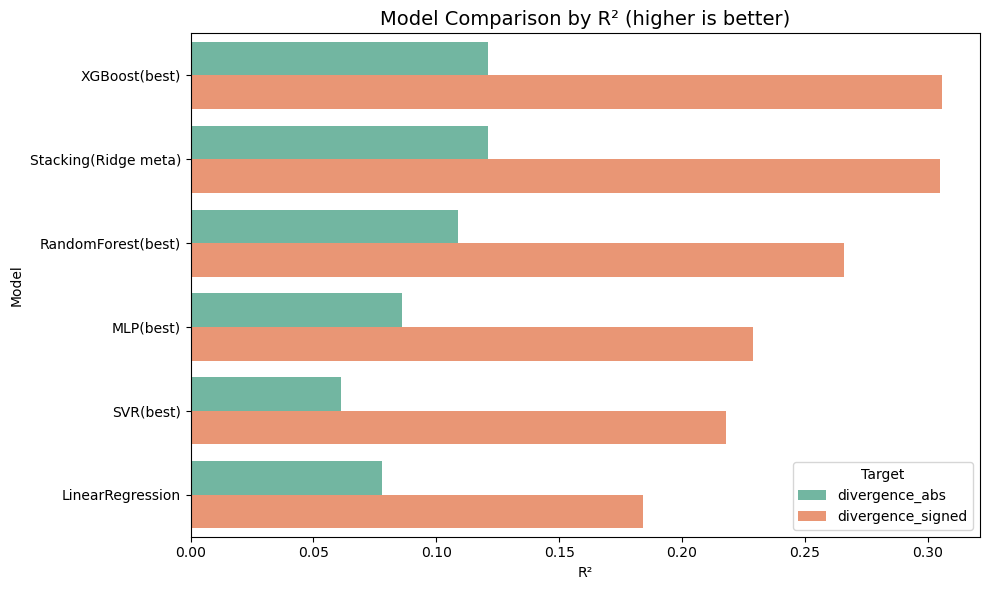

Saved: C:\Users\Vassilis\Desktop\figures\barplot_R2_horizontal_with_stacking_no_tree.png


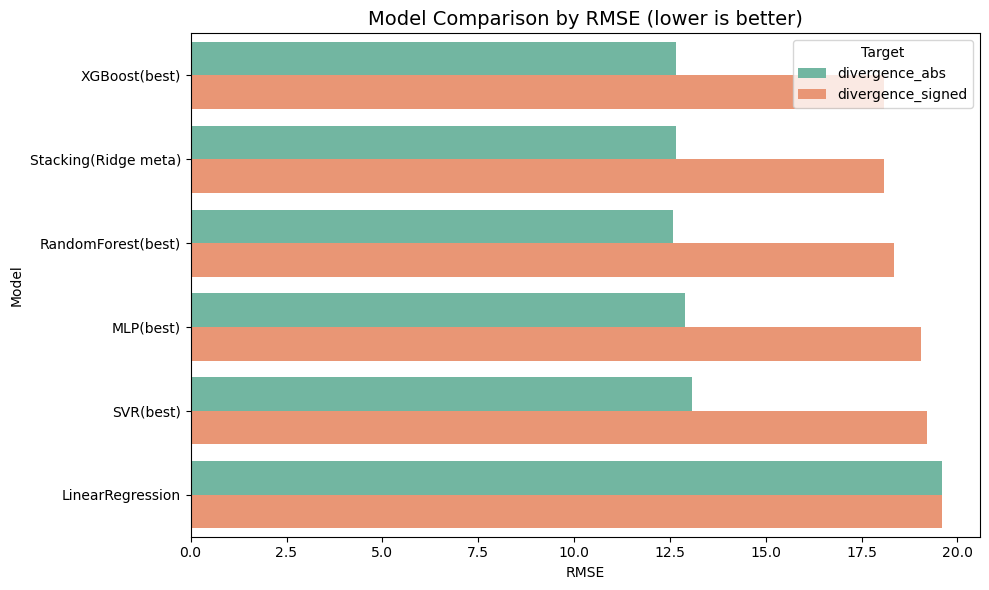

Saved: C:\Users\Vassilis\Desktop\figures\barplot_RMSE_horizontal_with_stacking_no_tree.png


In [ ]:

filtered_df = summary_df.drop(index="DecisionTree")

# Long format
long_df_filt = filtered_df.reset_index().melt(
    id_vars="Model",
    var_name="Target_Metric",
    value_name="Value"
)
long_df_filt[["Target", "Metric"]] = long_df_filt["Target_Metric"].str.rsplit("_", n=1, expand=True)
long_df_filt = long_df_filt.drop(columns="Target_Metric")

# --- Barplot R² ---
r2_df = long_df_filt[long_df_filt["Metric"] == "R2"].copy()
order_r2 = r2_df.groupby("Model")["Value"].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=r2_df, y="Model", x="Value", hue="Target",
    order=order_r2, palette="Set2"
)
plt.title("Model Comparison by R² (higher is better)", fontsize=14)
plt.xlabel("R²")
plt.ylabel("Model")
plt.legend(title="Target")
plt.tight_layout()

out_path_r2 = os.path.join(FIG_DIR, "barplot_R2_horizontal_with_stacking_no_tree.png")
plt.savefig(out_path_r2, dpi=300)
plt.show()
print(f"Saved: {out_path_r2}")

# --- Barplot RMSE ---
rmse_df = long_df_filt[long_df_filt["Metric"] == "RMSE"].copy()
order_rmse = rmse_df.groupby("Model")["Value"].mean().sort_values(ascending=True).index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=rmse_df, y="Model", x="Value", hue="Target",
    order=order_rmse, palette="Set2"
)
plt.title("Model Comparison by RMSE (lower is better)", fontsize=14)
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.legend(title="Target")
plt.tight_layout()

out_path_rmse = os.path.join(FIG_DIR, "barplot_RMSE_horizontal_with_stacking_no_tree.png")
plt.savefig(out_path_rmse, dpi=300)
plt.show()
print(f"Saved: {out_path_rmse}")


In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def permutation_importance_df(model, X, y, n_repeats=10, random_state=42, scoring="neg_mean_squared_error"):
    """
    Επιστρέφει Series με importances από permutation (όσο μεγαλύτερο τόσο πιο σημαντικό).
    Κανονικοποιεί σε ποσοστά ώστε να αθροίζουν στο 100% για συγκρισιμότητα μεταξύ μοντέλων.
    """
    r = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=random_state, scoring=scoring, n_jobs=-1)
    s = pd.Series(r.importances_mean, index=getattr(X, "columns", [f"f{i}" for i in range(X.shape[1])]), name="importance_raw")
    s = s.clip(lower=0)  
    total = s.sum()
    if total == 0:
        return s*0
    s = 100 * s / total
    s.name = "importance_pct"
    return s

def plot_topk_bar(imp_series, k=20, title="Permutation importance (top-k)", fname="perm_importance_topk"):
    imp_top = imp_series.sort_values(ascending=False).head(k)[::-1]
    plt.figure(figsize=(8, max(4, 0.35*k)))
    plt.barh(imp_top.index, imp_top.values)
    plt.title(title)
    plt.xlabel("Importance (% of total)")
    plt.tight_layout()
    savefig(fname)
    plt.show()


Saved: C:\Users\Vassilis\Desktop\figures\feature_importance_permutation_divergence_abs.csv
Saved: C:\Users\Vassilis\Desktop\figures\perm_importance_heatmap_abs_top25.png
Saved: C:\Users\Vassilis\Desktop\figures\perm_importance_heatmap_abs_top25.svg


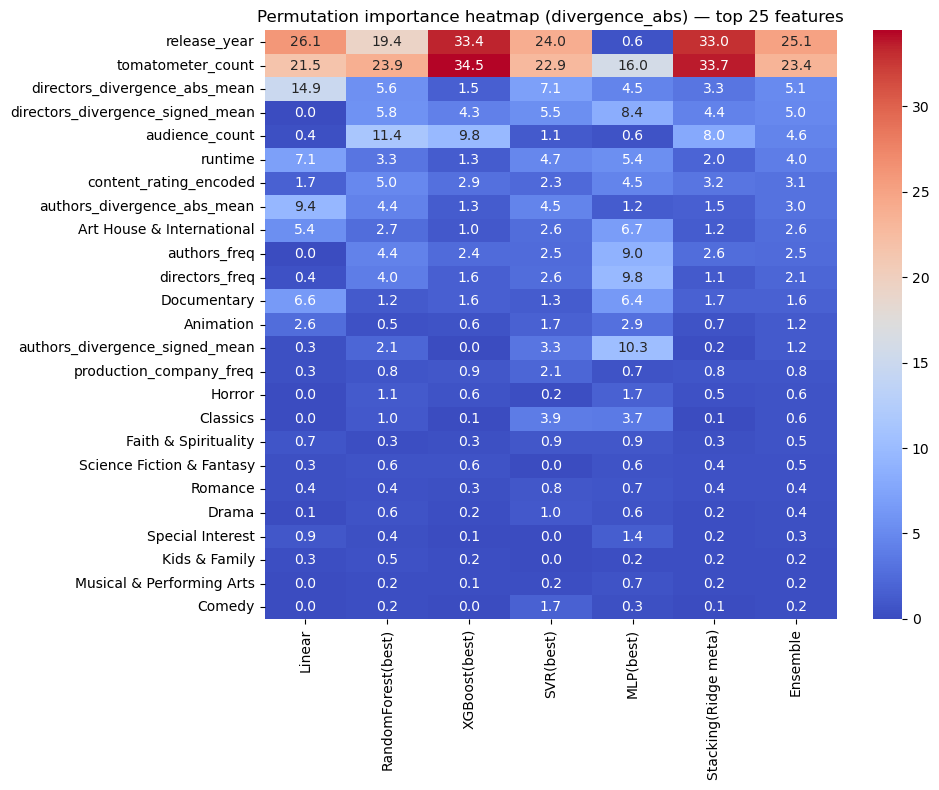

Saved: C:\Users\Vassilis\Desktop\figures\perm_importance_abs_ensemble_top20.png
Saved: C:\Users\Vassilis\Desktop\figures\perm_importance_abs_ensemble_top20.svg


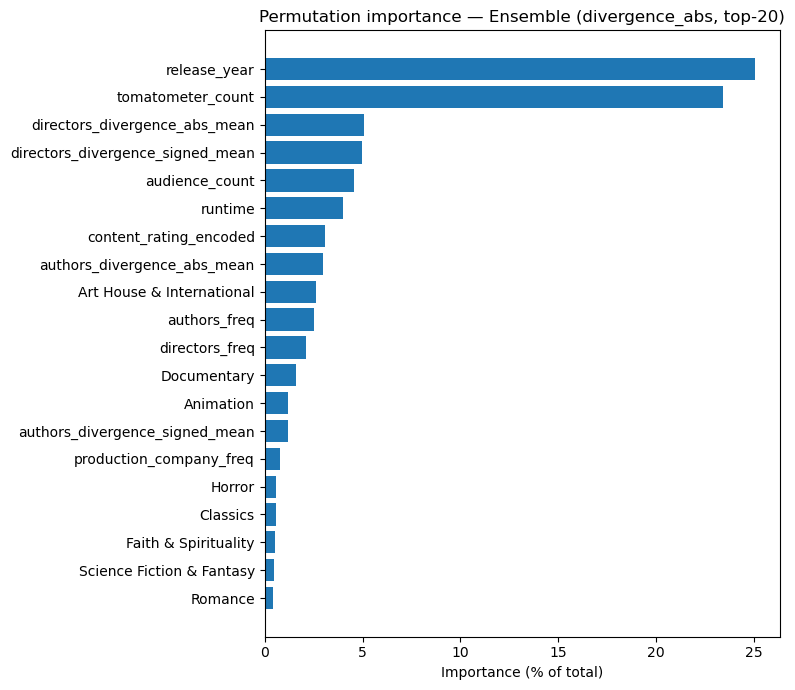

In [ ]:

models_abs = {}
if 'lin' in locals(): models_abs["Linear"] = lin
if 'best_rf_abs' in locals(): models_abs["RandomForest(best)"] = best_rf_abs
if 'best_xgb_abs' in locals(): models_abs["XGBoost(best)"] = best_xgb_abs
if 'best_svr_abs' in locals(): models_abs["SVR(best)"] = best_svr_abs
if 'best_mlp_abs' in locals(): models_abs["MLP(best)"] = best_mlp_abs
if 'stack_reg_abs' in locals(): models_abs["Stacking(Ridge meta)"] = stack_reg_abs  


imp_list_abs = []
for name, model in models_abs.items():
    s = permutation_importance_df(model, X_test, y_test_abs, n_repeats=10, scoring="neg_mean_squared_error")
    s.name = name
    imp_list_abs.append(s)

imp_abs_df = pd.concat(imp_list_abs, axis=1).fillna(0)


imp_abs_df["Ensemble"] = imp_abs_df.median(axis=1)


abs_csv = os.path.join(FIG_DIR, "feature_importance_permutation_divergence_abs.csv")
imp_abs_df.sort_values("Ensemble", ascending=False).to_csv(abs_csv)
print(f"Saved: {abs_csv}")


top_feats_abs = imp_abs_df["Ensemble"].sort_values(ascending=False).head(25).index
plt.figure(figsize=(10, 8))
sns.heatmap(
    imp_abs_df.loc[top_feats_abs, imp_abs_df.columns],
    annot=True, fmt=".1f", cmap="coolwarm"
)
plt.title("Permutation importance heatmap (divergence_abs) — top 25 features")
plt.tight_layout()
savefig("perm_importance_heatmap_abs_top25")
plt.show()

# Barplot top-20 Ensemble
plot_topk_bar(imp_abs_df["Ensemble"], k=20,
              title="Permutation importance — Ensemble (divergence_abs, top-20)",
              fname="perm_importance_abs_ensemble_top20")


Saved: C:\Users\Vassilis\Desktop\figures\feature_importance_permutation_divergence_signed.csv
Saved: C:\Users\Vassilis\Desktop\figures\perm_importance_heatmap_signed_top25.png
Saved: C:\Users\Vassilis\Desktop\figures\perm_importance_heatmap_signed_top25.svg


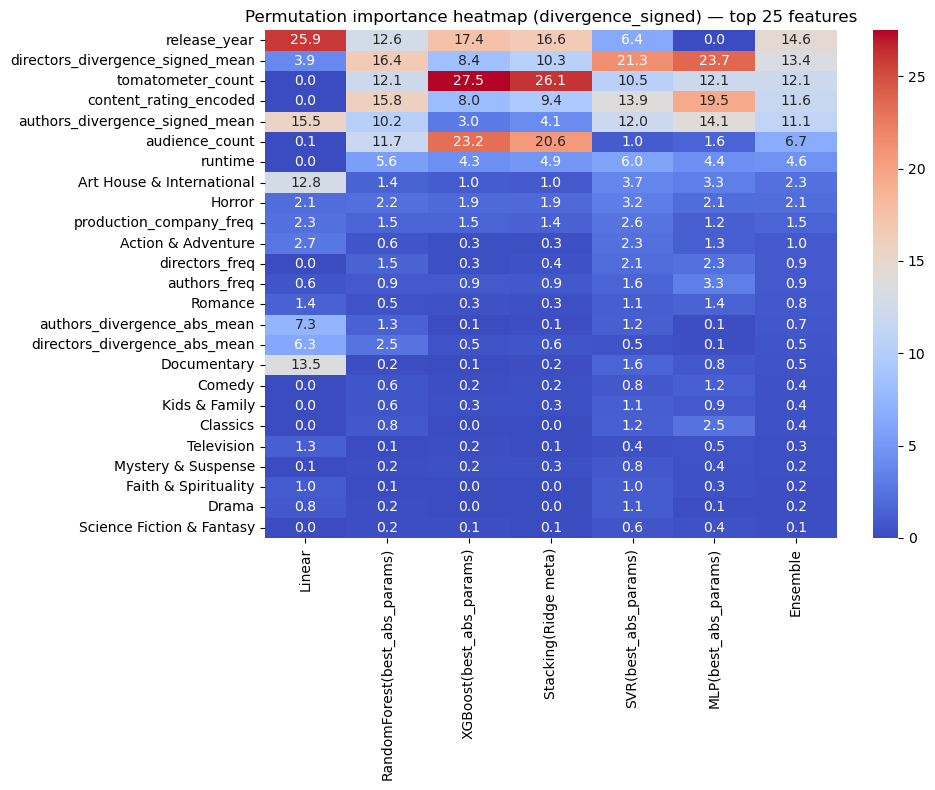

Saved: C:\Users\Vassilis\Desktop\figures\perm_importance_signed_ensemble_top20.png
Saved: C:\Users\Vassilis\Desktop\figures\perm_importance_signed_ensemble_top20.svg


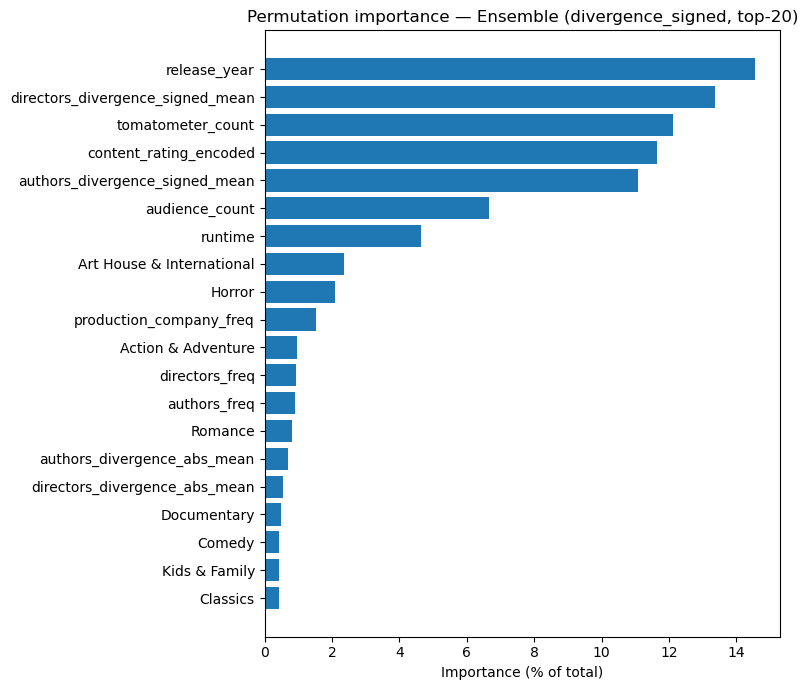

In [ ]:

models_signed = {}
if 'lin' in locals(): models_signed["Linear"] = lin
if 'best_rf_signed' in locals(): models_signed["RandomForest(best_abs_params)"] = best_rf_signed
if 'best_rf_signed_direct' in locals(): models_signed["RandomForest(best_signed)"] = best_rf_signed_direct
if 'xgb_signed_same_params' in locals(): models_signed["XGBoost(best_abs_params)"] = xgb_signed_same_params
if 'stack_reg_signed' in locals(): models_signed["Stacking(Ridge meta)"] = stack_reg_signed
if 'best_svr_signed' in locals(): models_signed["SVR(best_abs_params)"] = best_svr_signed
if 'best_mlp_signed' in locals(): models_signed["MLP(best_abs_params)"] = best_mlp_signed

imp_list_signed = []
for name, model in models_signed.items():
    s = permutation_importance_df(model, X_test, y_test_signed, n_repeats=10, scoring="neg_mean_squared_error")
    s.name = name
    imp_list_signed.append(s)

imp_signed_df = pd.concat(imp_list_signed, axis=1).fillna(0)
imp_signed_df["Ensemble"] = imp_signed_df.median(axis=1)


signed_csv = os.path.join(FIG_DIR, "feature_importance_permutation_divergence_signed.csv")
imp_signed_df.sort_values("Ensemble", ascending=False).to_csv(signed_csv)
print(f"Saved: {signed_csv}")

# Heatmap (top-25)
top_feats_signed = imp_signed_df["Ensemble"].sort_values(ascending=False).head(25).index
plt.figure(figsize=(10, 8))
sns.heatmap(
    imp_signed_df.loc[top_feats_signed, imp_signed_df.columns],
    annot=True, fmt=".1f", cmap="coolwarm"
)
plt.title("Permutation importance heatmap (divergence_signed) — top 25 features")
plt.tight_layout()
savefig("perm_importance_heatmap_signed_top25")
plt.show()

# Barplot top-20 Ensemble
plot_topk_bar(imp_signed_df["Ensemble"], k=20,
              title="Permutation importance — Ensemble (divergence_signed, top-20)",
              fname="perm_importance_signed_ensemble_top20")


# Classification

KMeans centers (sorted): [-21.29188514   2.20202919  32.22274695]
Class counts (train): {'neutral': 5618, 'critics': 4005, 'audience': 2541}
Class counts (test): {'neutral': 1376, 'critics': 972, 'audience': 693}
Saved: C:\Users\Vassilis\Desktop\figures\kmeans_divergence_signed_hist.png
Saved: C:\Users\Vassilis\Desktop\figures\kmeans_divergence_signed_hist.svg


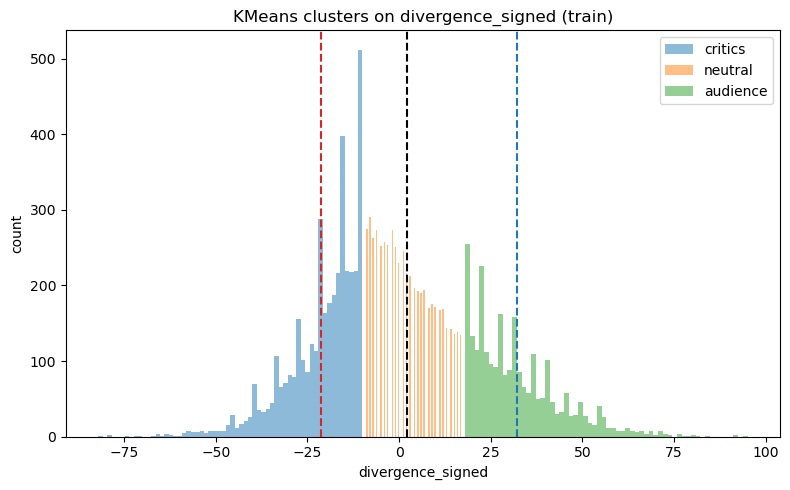

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

SEED = 42


kmeans = KMeans(n_clusters=3, random_state=SEED, n_init=10)
kmeans.fit(train[["divergence_signed"]])

centers = kmeans.cluster_centers_.flatten()
order = np.argsort(centers)  # low → mid → high





label_map = {order[0]: "critics", order[1]: "neutral", order[2]: "audience"}

train["divergence_class"] = [label_map[c] for c in kmeans.labels_]
test["divergence_class"]  = [label_map[c] for c in kmeans.predict(test[["divergence_signed"]])]

print("KMeans centers (sorted):", np.sort(centers))
print("Class counts (train):", train["divergence_class"].value_counts().to_dict())
print("Class counts (test):",  test["divergence_class"].value_counts().to_dict())


plt.figure(figsize=(8,5))
for lab, color in [("critics","tab:red"), ("neutral","tab:gray"), ("audience","tab:blue")]:
    vals = train.loc[train["divergence_class"]==lab, "divergence_signed"]
    plt.hist(vals, bins=60, alpha=0.5, label=lab)
plt.axvline(np.sort(centers)[0], ls="--", color="tab:red")
plt.axvline(np.sort(centers)[1], ls="--", color="k")
plt.axvline(np.sort(centers)[2], ls="--", color="tab:blue")
plt.title("KMeans clusters on divergence_signed (train)")
plt.xlabel("divergence_signed")
plt.ylabel("count")
plt.legend()
plt.tight_layout()
savefig("kmeans_divergence_signed_hist")
plt.show()


In [ ]:

features = [
    'runtime', 'release_year', 'directors_freq', 'directors_divergence_signed_mean', 'directors_divergence_abs_mean',
    'authors_freq', 'authors_divergence_signed_mean', 'authors_divergence_abs_mean',
    'production_company_freq', 'tomatometer_count', 'audience_count',
    'Comedy', 'Drama', 'Action & Adventure', 'Animation', 'Anime & Manga', 'Art House & International', 
    'Classics', 'Cult Movies', 'Documentary', 'Faith & Spirituality', 'Gay & Lesbian', 'Horror', 'Kids & Family', 
    'Musical & Performing Arts', 'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy', 'Special Interest', 
    'Sports & Fitness', 'Television', 'Western', 'content_rating_encoded'
]

X_train_clf = train[features].copy()
X_test_clf  = test[features].copy()

y_train_clf = train["divergence_class"].copy()
y_test_clf  = test["divergence_class"].copy()

print("X_train_clf:", X_train_clf.shape, "| X_test_clf:", X_test_clf.shape)
print("Classes:", sorted(y_train_clf.unique()))


X_train_clf: (12164, 33) | X_test_clf: (3041, 33)
Classes: ['audience', 'critics', 'neutral']


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

CLASS_ORDER = ["critics", "neutral", "audience"]  

def evaluate_classifier(clf, X_train, y_train, X_test, y_test, name, fig_prefix="clf"):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc  = accuracy_score(y_test, y_pred)
    bacc = balanced_accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=CLASS_ORDER, average="macro", zero_division=0)

    print(f"{name}: ACC={acc:.3f} | BACC={bacc:.3f} | F1(macro)={f1:.3f} | PREC(macro)={prec:.3f} | REC(macro)={rec:.3f}")

    # Confusion matrix (normalized by true labels)
    cm = confusion_matrix(y_test, y_pred, labels=CLASS_ORDER, normalize="true")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_ORDER)
    fig, ax = plt.subplots(figsize=(5.5,5))
    disp.plot(ax=ax, cmap="Blues", values_format=".2f", colorbar=False)
    ax.set_title(f"Confusion Matrix — {name}")
    plt.tight_layout()
    savefig(f"{fig_prefix}_cm_{name.replace(' ','_')}")
    plt.show()

    return {"ACC": acc, "BACC": bacc, "F1_macro": f1, "PREC_macro": prec, "REC_macro": rec}


RandomForest: ACC=0.554 | BACC=0.506 | F1(macro)=0.515 | PREC(macro)=0.561 | REC(macro)=0.506
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_randomforest.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_randomforest.svg


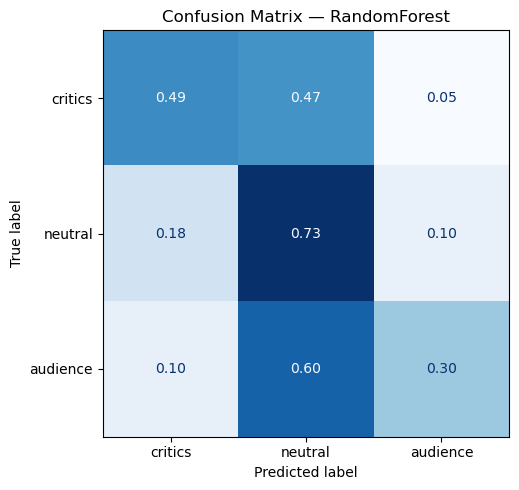

ExtraTrees: ACC=0.543 | BACC=0.499 | F1(macro)=0.508 | PREC(macro)=0.547 | REC(macro)=0.499
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_extratrees.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_extratrees.svg


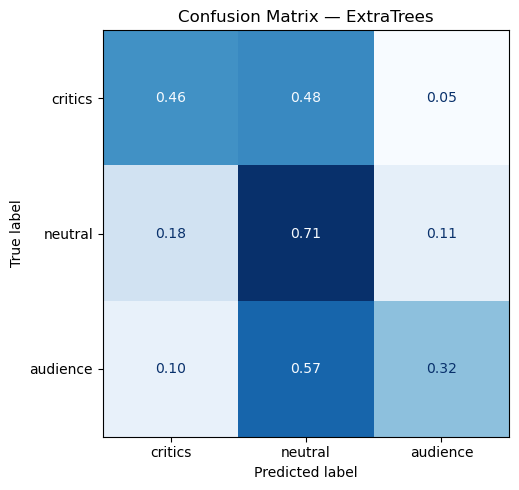

Logistic: ACC=0.408 | BACC=0.405 | F1(macro)=0.390 | PREC(macro)=0.407 | REC(macro)=0.405
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_logistic.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_logistic.svg


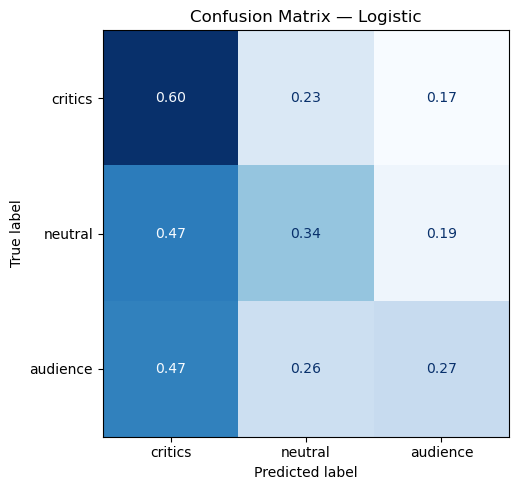

RidgeCls: ACC=0.486 | BACC=0.531 | F1(macro)=0.485 | PREC(macro)=0.505 | REC(macro)=0.531
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_ridgecls.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_ridgecls.svg


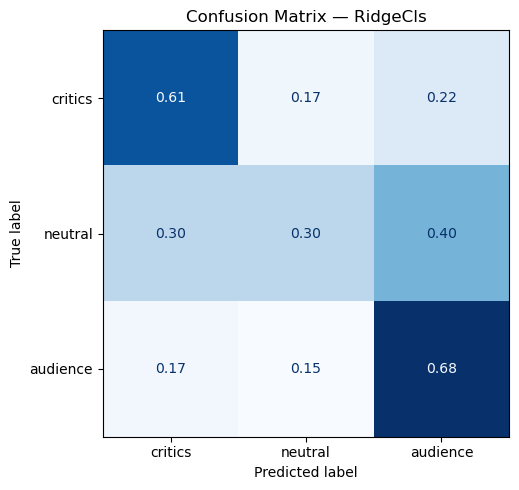

SVC: ACC=0.479 | BACC=0.529 | F1(macro)=0.477 | PREC(macro)=0.505 | REC(macro)=0.529
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_svc.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_svc.svg


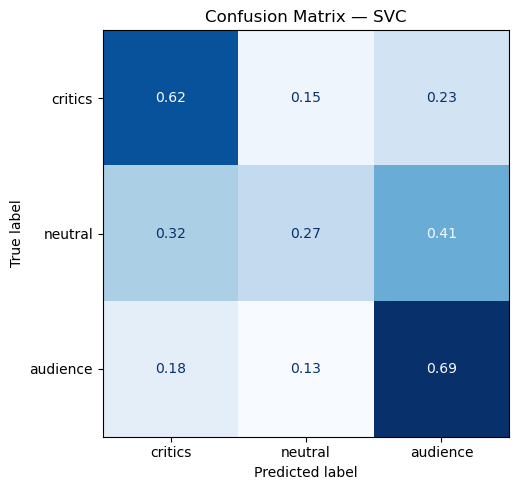

KNN: ACC=0.512 | BACC=0.487 | F1(macro)=0.493 | PREC(macro)=0.504 | REC(macro)=0.487
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_knn.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_knn.svg


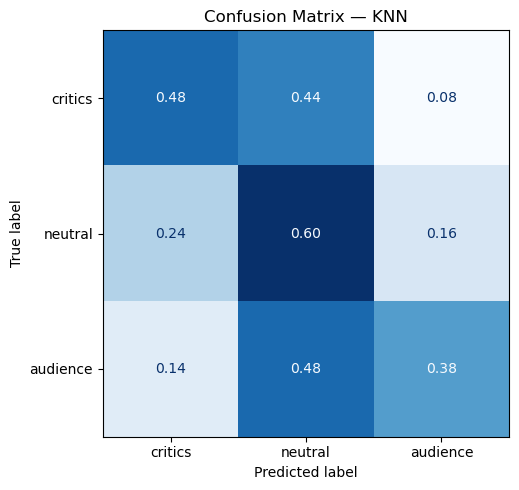

NaiveBayes: ACC=0.453 | BACC=0.334 | F1(macro)=0.212 | PREC(macro)=0.333 | REC(macro)=0.334
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_naivebayes.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_naivebayes.svg


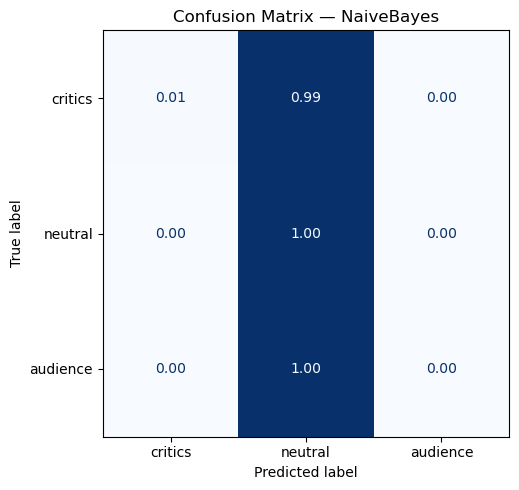

,ACC,BACC,F1_macro,PREC_macro,REC_macro
Model,,,,,
RandomForest,0.554,0.506,0.515,0.561,0.506
ExtraTrees,0.543,0.499,0.508,0.547,0.499
KNN,0.512,0.487,0.493,0.504,0.487
RidgeCls,0.486,0.531,0.485,0.505,0.531
SVC,0.479,0.529,0.477,0.505,0.529
Logistic,0.408,0.405,0.390,0.407,0.405
NaiveBayes,0.453,0.334,0.212,0.333,0.334


Saved table: C:\Users\Vassilis\Desktop\figures\classification_test_results.csv


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import os

SEED = 42

models_clf = {
    "RandomForest": RandomForestClassifier(n_estimators=500, random_state=SEED, class_weight="balanced", n_jobs=-1),
    "ExtraTrees":   ExtraTreesClassifier(n_estimators=500, random_state=SEED, class_weight="balanced", n_jobs=-1),
    "Logistic":     LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1),
    "RidgeCls":     RidgeClassifier(class_weight="balanced", random_state=SEED),
    "SVC":          Pipeline([("scaler", StandardScaler(with_mean=False)), ("svc", SVC(kernel="rbf", C=2.0, gamma="scale", class_weight="balanced"))]),
    "KNN":          Pipeline([("scaler", StandardScaler(with_mean=False)), ("knn", KNeighborsClassifier(n_neighbors=15))]),
    "NaiveBayes":   GaussianNB()
}

clf_results = []
for name, clf in models_clf.items():
    metrics = evaluate_classifier(clf, X_train_clf, y_train_clf, X_test_clf, y_test_clf, name=name, fig_prefix="classification")
    row = {"Model": name}
    row.update(metrics)
    clf_results.append(row)

clf_df = pd.DataFrame(clf_results).set_index("Model").sort_values("F1_macro", ascending=False)
display(clf_df.round(3))


out_csv = os.path.join(FIG_DIR, "classification_test_results.csv")
clf_df.to_csv(out_csv)
print(f"Saved table: {out_csv}")


Saved: C:\Users\Vassilis\Desktop\figures\classification_barh_f1_macro.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_barh_f1_macro.svg


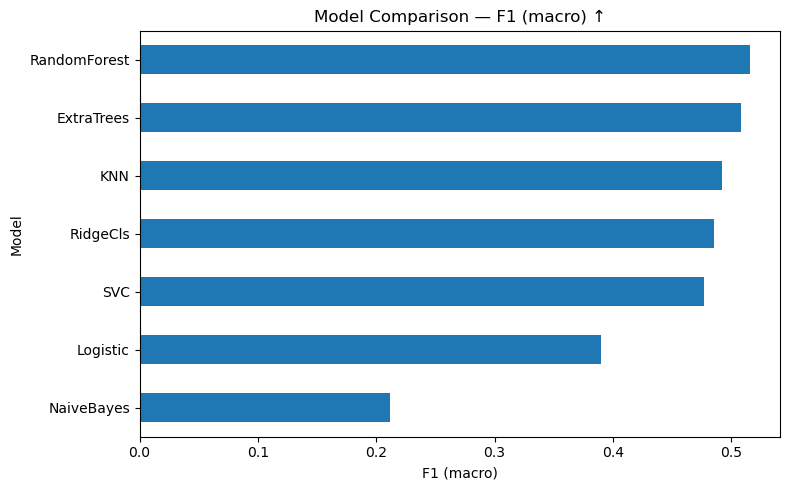

Saved: C:\Users\Vassilis\Desktop\figures\classification_barh_balanced_accuracy.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_barh_balanced_accuracy.svg


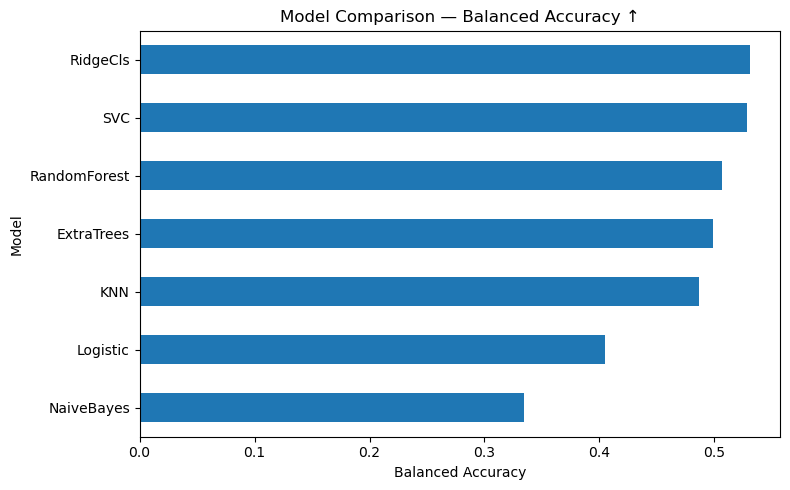

In [35]:
import matplotlib.pyplot as plt

# F1 (macro)
plt.figure(figsize=(8,5))
clf_df["F1_macro"].sort_values(ascending=True).plot(kind="barh")
plt.title("Model Comparison — F1 (macro) ↑")
plt.xlabel("F1 (macro)")
plt.tight_layout()
savefig("classification_barh_f1_macro")
plt.show()

# Balanced Accuracy
plt.figure(figsize=(8,5))
clf_df["BACC"].sort_values(ascending=True).plot(kind="barh")
plt.title("Model Comparison — Balanced Accuracy ↑")
plt.xlabel("Balanced Accuracy")
plt.tight_layout()
savefig("classification_barh_balanced_accuracy")
plt.show()


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best RF params: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best RF CV score (f1_macro): 0.5422115647336617
RandomForest (tuned): ACC=0.549 | BACC=0.536 | F1(macro)=0.537 | PREC(macro)=0.539 | REC(macro)=0.536
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_randomforest_tuned.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_randomforest_tuned.svg


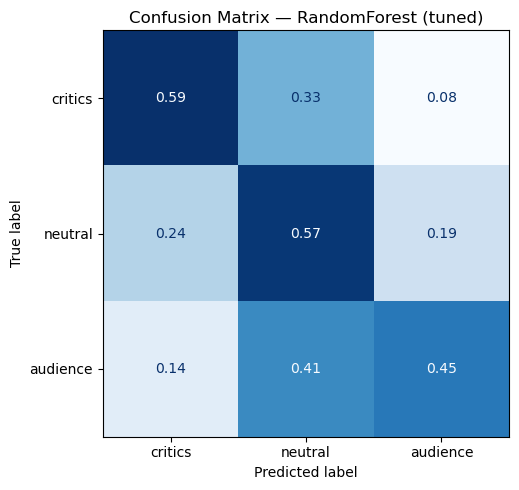

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    "n_estimators": [200, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": ["balanced"]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=SEED, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train_clf, y_train_clf)
print("Best RF params:", grid_rf.best_params_)
print("Best RF CV score (f1_macro):", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_
rf_metrics = evaluate_classifier(best_rf, X_train_clf, y_train_clf, X_test_clf, y_test_clf, "RandomForest (tuned)", fig_prefix="classification")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best ET params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best ET CV score (f1_macro): 0.5270494010637488
ExtraTrees (tuned): ACC=0.537 | BACC=0.546 | F1(macro)=0.536 | PREC(macro)=0.531 | REC(macro)=0.546
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_extratrees_tuned.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_extratrees_tuned.svg


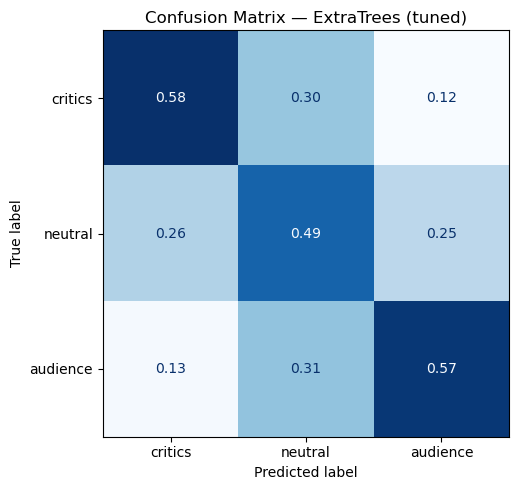

In [37]:
param_grid_et = {
    "n_estimators": [200, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": ["balanced"]
}

grid_et = GridSearchCV(
    estimator=ExtraTreesClassifier(random_state=SEED, n_jobs=-1),
    param_grid=param_grid_et,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

grid_et.fit(X_train_clf, y_train_clf)
print("Best ET params:", grid_et.best_params_)
print("Best ET CV score (f1_macro):", grid_et.best_score_)

best_et = grid_et.best_estimator_
et_metrics = evaluate_classifier(best_et, X_train_clf, y_train_clf, X_test_clf, y_test_clf, "ExtraTrees (tuned)", fig_prefix="classification")


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best SVC params: {'svc__C': 0.5, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best SVC CV score (f1_macro): 0.4978464952707897
SVC (tuned): ACC=0.506 | BACC=0.531 | F1(macro)=0.508 | PREC(macro)=0.507 | REC(macro)=0.531
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_svc_tuned.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_cm_svc_tuned.svg


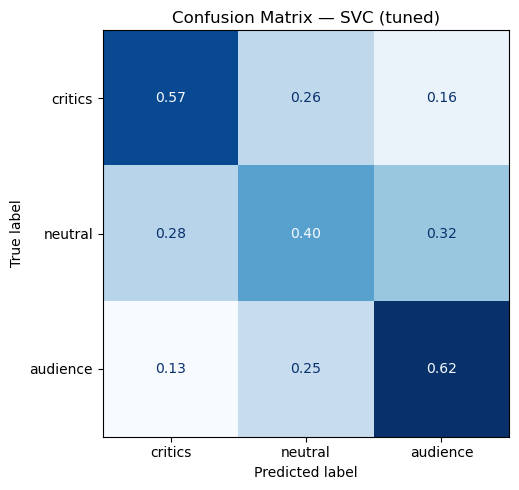

In [38]:
param_grid_svc = {
    "svc__C": [0.5, 1, 2],
    "svc__gamma": ["scale", 0.1, 0.01],
    "svc__kernel": ["rbf"]
}

svc_pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("svc", SVC(class_weight="balanced"))
])

grid_svc = GridSearchCV(
    estimator=svc_pipe,
    param_grid=param_grid_svc,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

grid_svc.fit(X_train_clf, y_train_clf)
print("Best SVC params:", grid_svc.best_params_)
print("Best SVC CV score (f1_macro):", grid_svc.best_score_)

best_svc = grid_svc.best_estimator_
svc_metrics = evaluate_classifier(best_svc, X_train_clf, y_train_clf, X_test_clf, y_test_clf, "SVC (tuned)", fig_prefix="classification")


In [39]:
tuned_results = pd.DataFrame([
    {"Model": "RandomForest (tuned)", **rf_metrics},
    {"Model": "ExtraTrees (tuned)", **et_metrics},
    {"Model": "SVC (tuned)", **svc_metrics},
]).set_index("Model").round(3)

display(tuned_results)

out_csv_tuned = os.path.join(FIG_DIR, "classification_test_results_tuned.csv")
tuned_results.to_csv(out_csv_tuned)
print(f"Saved tuned results: {out_csv_tuned}")


,ACC,BACC,F1_macro,PREC_macro,REC_macro
Model,,,,,
RandomForest (tuned),0.549,0.536,0.537,0.539,0.536
ExtraTrees (tuned),0.537,0.546,0.536,0.531,0.546
SVC (tuned),0.506,0.531,0.508,0.507,0.531


Saved tuned results: C:\Users\Vassilis\Desktop\figures\classification_test_results_tuned.csv


Saved: C:\Users\Vassilis\Desktop\figures\classification_barh_f1_macro_default_vs_tuned_fixed.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_barh_f1_macro_default_vs_tuned_fixed.svg


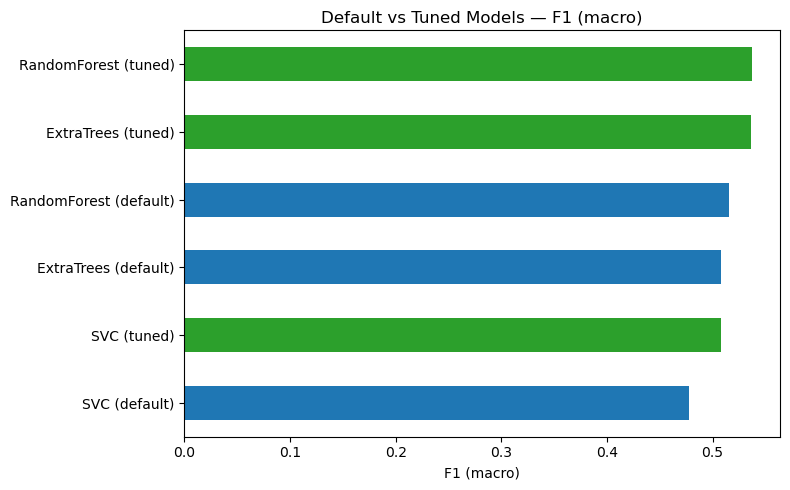

Saved: C:\Users\Vassilis\Desktop\figures\classification_barh_bacc_default_vs_tuned_fixed.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_barh_bacc_default_vs_tuned_fixed.svg


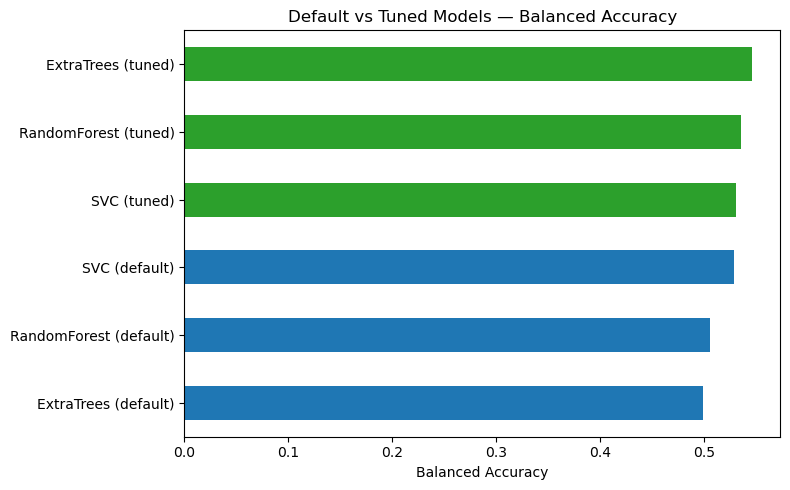

,ACC,BACC,F1_macro,PREC_macro,REC_macro
RandomForest (default),0.554,0.506,0.515,0.561,0.506
ExtraTrees (default),0.543,0.499,0.508,0.547,0.499
SVC (default),0.479,0.529,0.477,0.505,0.529
RandomForest (tuned),0.549,0.536,0.537,0.539,0.536
ExtraTrees (tuned),0.537,0.546,0.536,0.531,0.546
SVC (tuned),0.506,0.531,0.508,0.507,0.531


In [ ]:

default_csv = os.path.join(FIG_DIR, "classification_test_results.csv")
tuned_csv   = os.path.join(FIG_DIR, "classification_test_results_tuned.csv")

df_default = pd.read_csv(default_csv, index_col=0)
df_tuned   = pd.read_csv(tuned_csv, index_col=0)


df_default_sub = df_default.loc[["RandomForest", "ExtraTrees", "SVC"]]
df_default_sub.index = [i + " (default)" for i in df_default_sub.index]

df_tuned.index = [i for i in df_tuned.index]  


df_compare = pd.concat([df_default_sub, df_tuned])

# --- Plot 1: F1 (macro)
plt.figure(figsize=(8,5))


color_map = pd.Series(
    ["tab:blue" if "default" in idx else "tab:green" for idx in df_compare.index],
    index=df_compare.index
)


f1_sorted = df_compare["F1_macro"].sort_values(ascending=True)
f1_sorted.plot(kind="barh", color=color_map.loc[f1_sorted.index])

plt.title("Default vs Tuned Models — F1 (macro)")
plt.xlabel("F1 (macro)")
plt.tight_layout()
savefig("classification_barh_f1_macro_default_vs_tuned_fixed")
plt.show()


plt.figure(figsize=(8,5))

bacc_sorted = df_compare["BACC"].sort_values(ascending=True)
bacc_sorted.plot(kind="barh", color=color_map.loc[bacc_sorted.index])

plt.title("Default vs Tuned Models — Balanced Accuracy")
plt.xlabel("Balanced Accuracy")
plt.tight_layout()
savefig("classification_barh_bacc_default_vs_tuned_fixed")
plt.show()



display(df_compare.round(3))


Saved: C:\Users\Vassilis\Desktop\figures\classification_groupedbar_f1_macro.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_groupedbar_f1_macro.svg


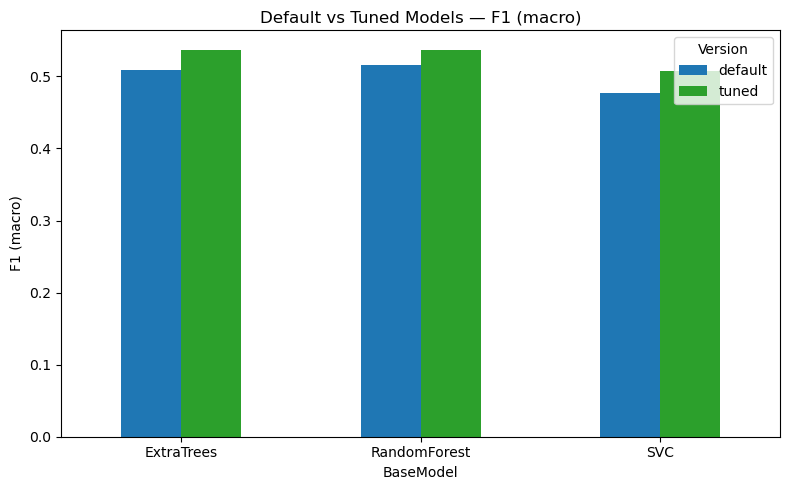

Saved: C:\Users\Vassilis\Desktop\figures\classification_groupedbar_bacc.png
Saved: C:\Users\Vassilis\Desktop\figures\classification_groupedbar_bacc.svg


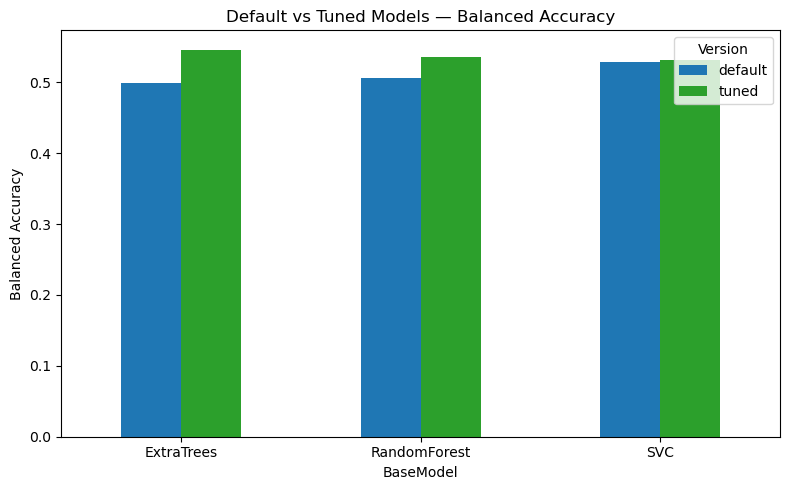

In [ ]:

compare_data = []

for model in ["RandomForest", "ExtraTrees", "SVC"]:
    # Default
    row_default = df_default.loc[model].to_dict()
    row_default.update({"BaseModel": model, "Version": "default"})
    compare_data.append(row_default)
    # Tuned
    row_tuned = df_tuned.loc[f"{model} (tuned)"].to_dict()
    row_tuned.update({"BaseModel": model, "Version": "tuned"})
    compare_data.append(row_tuned)

df_grouped = pd.DataFrame(compare_data)


pivot_f1   = df_grouped.pivot(index="BaseModel", columns="Version", values="F1_macro")
pivot_bacc = df_grouped.pivot(index="BaseModel", columns="Version", values="BACC")

# --- Plot 1: F1 (macro)
pivot_f1.plot(kind="bar", figsize=(8,5), color={"default":"tab:blue", "tuned":"tab:green"})
plt.title("Default vs Tuned Models — F1 (macro)")
plt.ylabel("F1 (macro)")
plt.xticks(rotation=0)
plt.tight_layout()
savefig("classification_groupedbar_f1_macro")
plt.show()

# --- Plot 2: Balanced Accuracy
pivot_bacc.plot(kind="bar", figsize=(8,5), color={"default":"tab:blue", "tuned":"tab:green"})
plt.title("Default vs Tuned Models — Balanced Accuracy")
plt.ylabel("Balanced Accuracy")
plt.xticks(rotation=0)
plt.tight_layout()
savefig("classification_groupedbar_bacc")
plt.show()
